# [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)

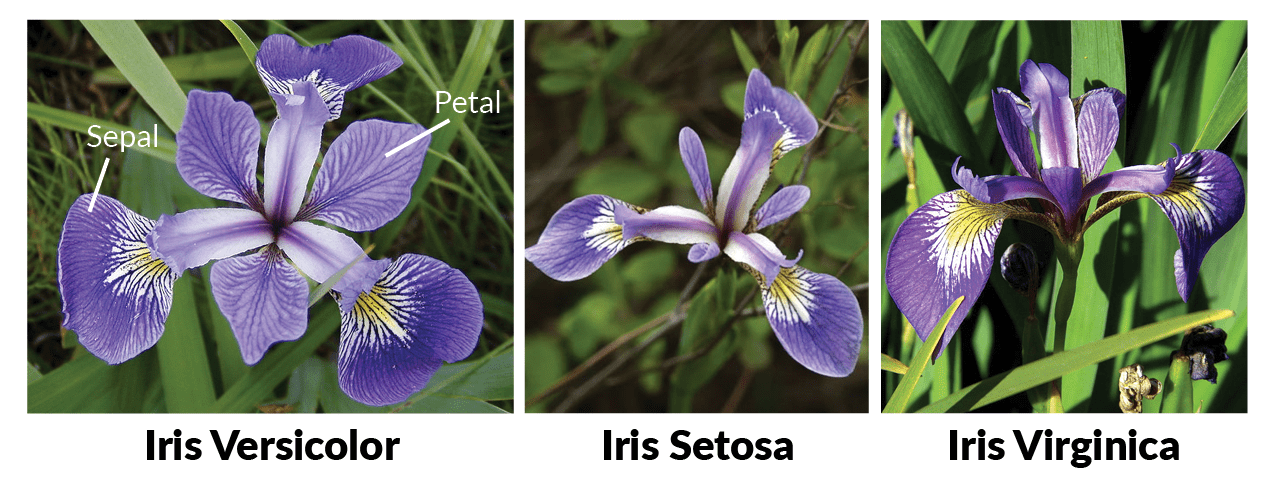

### Información del Dataset:

Este es, probablemente, el dataset más conocido en cuanto al apredizaje de reconocimiento de patrones. 

El "Iris flower dataset"  o "Iris Fisher dataset" es un conjunto de datos multivariante creado por Ronald Fisher en su articulo de 1936, como un ejemplo de análisis discriminativo lineal. 

A veces, se llama "Iris Anderson dataset" porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato».

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminativo lineal para distinguir entre una especie y otra.

El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta. Una clase es linealmente separable de las otras 2; las otras 2 NO son linealmente separables entre sí.

Atributo a predecir: tipo de iris.

### Información de atributos:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

## Análisis exploratorio de los datos

In [1]:
! pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../datasets/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### Desbalanceo de las clases
Aquí comprueba cuántas instancias tenemos de cada clase

In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Visualización de los datos

Compara las variables entre sí para intentar inferir relaciones entre ellas

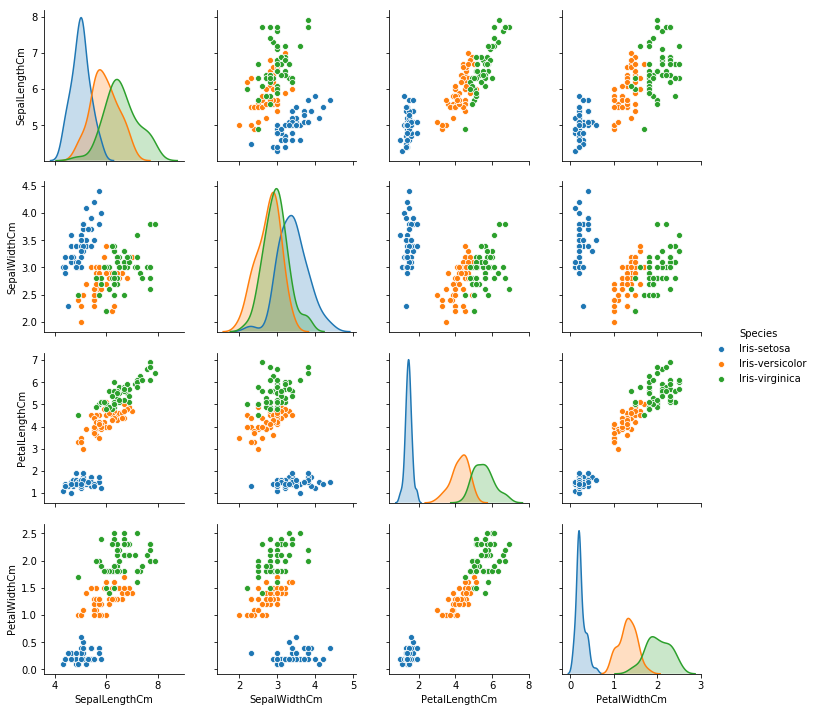

In [7]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species')
plt.show()

- Después de representar gráficamente las features, queda claro que la relación entre la especie `iris-setosa` es diferente de las de las otras dos especies. 
- Además, existe una cierta superposición en las features de las otras dos especies, `iris-versicolor` e `iris-virginica`.

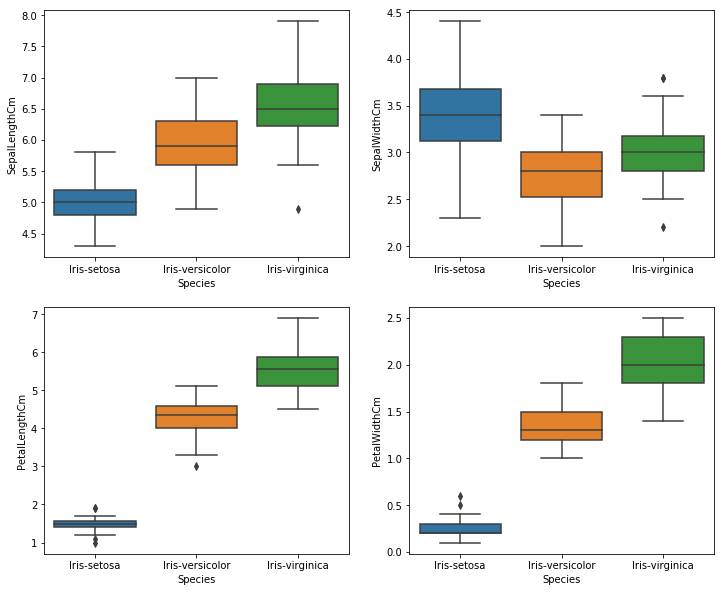

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y="PetalWidthCm",data=df)

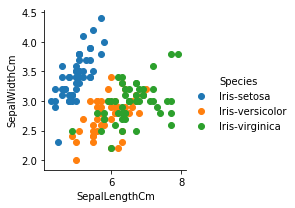

In [9]:
sns.FacetGrid(df, hue="Species").map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

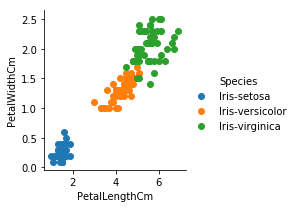

In [10]:
sns.FacetGrid(df, hue="Species").map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

## Preprocesamiento

### Valores nulos 

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Species,0,0.0
PetalWidthCm,0,0.0
PetalLengthCm,0,0.0
SepalWidthCm,0,0.0
SepalLengthCm,0,0.0


### Detección de outliers

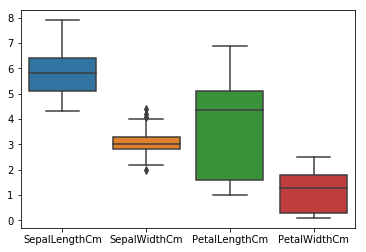

In [13]:
sns.boxplot(data=df.drop(['Id'], 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60f1895cc0>,
      dtype=object)

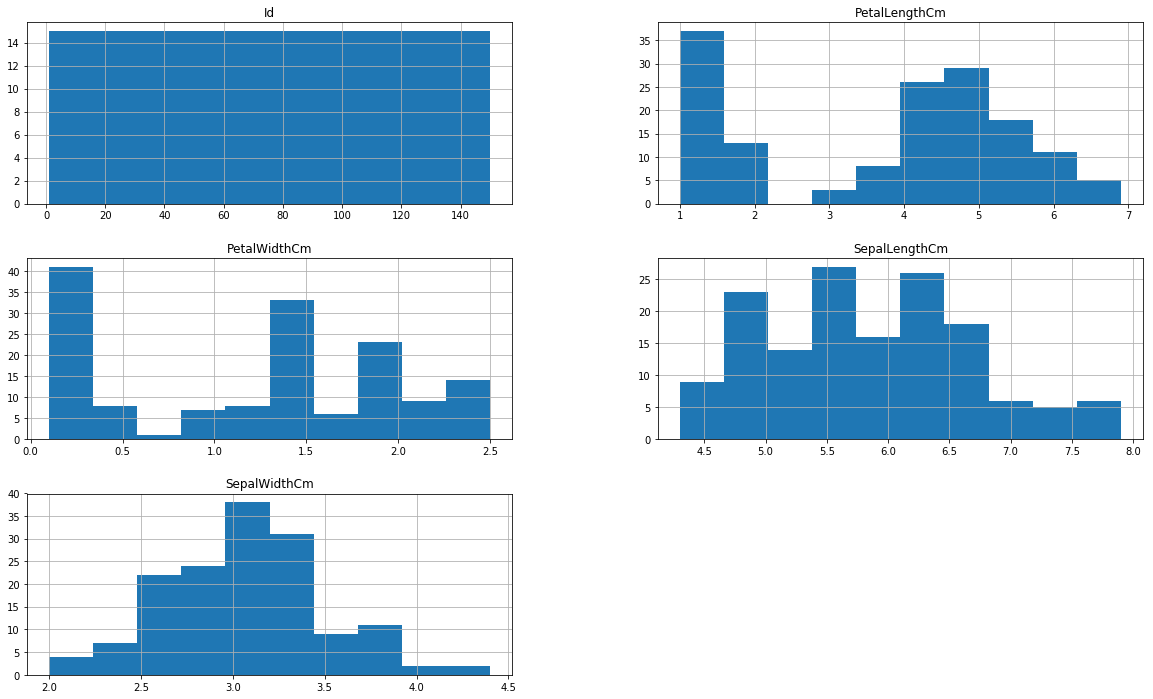

In [14]:
plt.rcParams['figure.figsize'] = (20, 12)
df.hist()

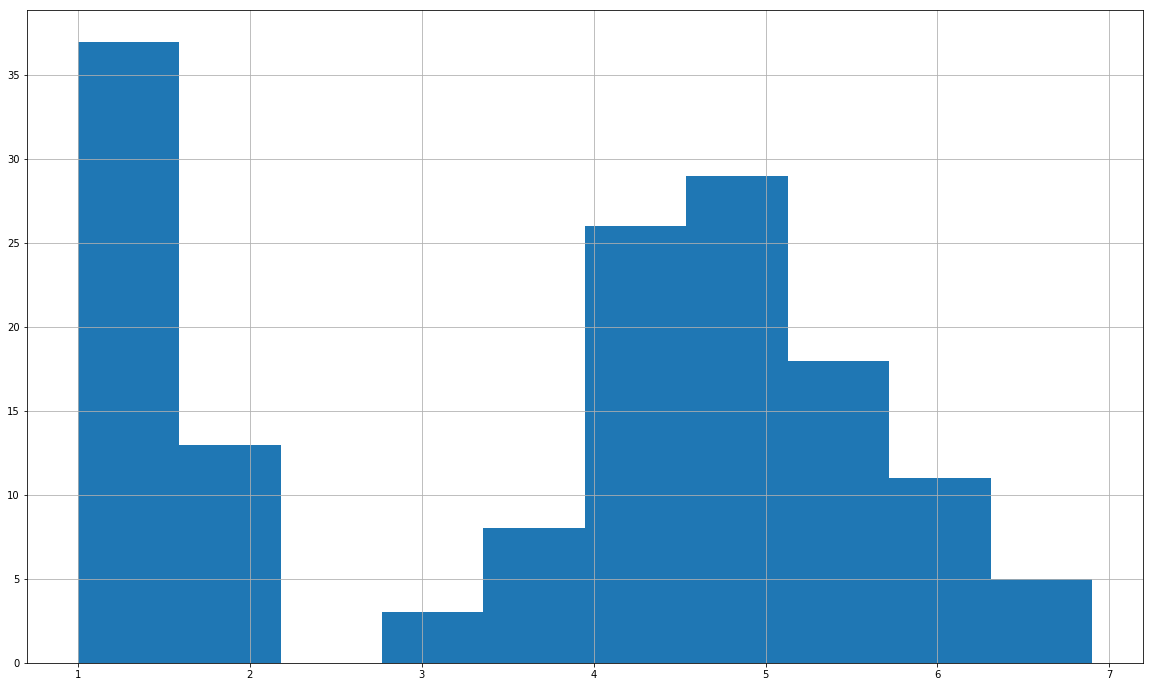

In [15]:
df['PetalLengthCm'].hist()

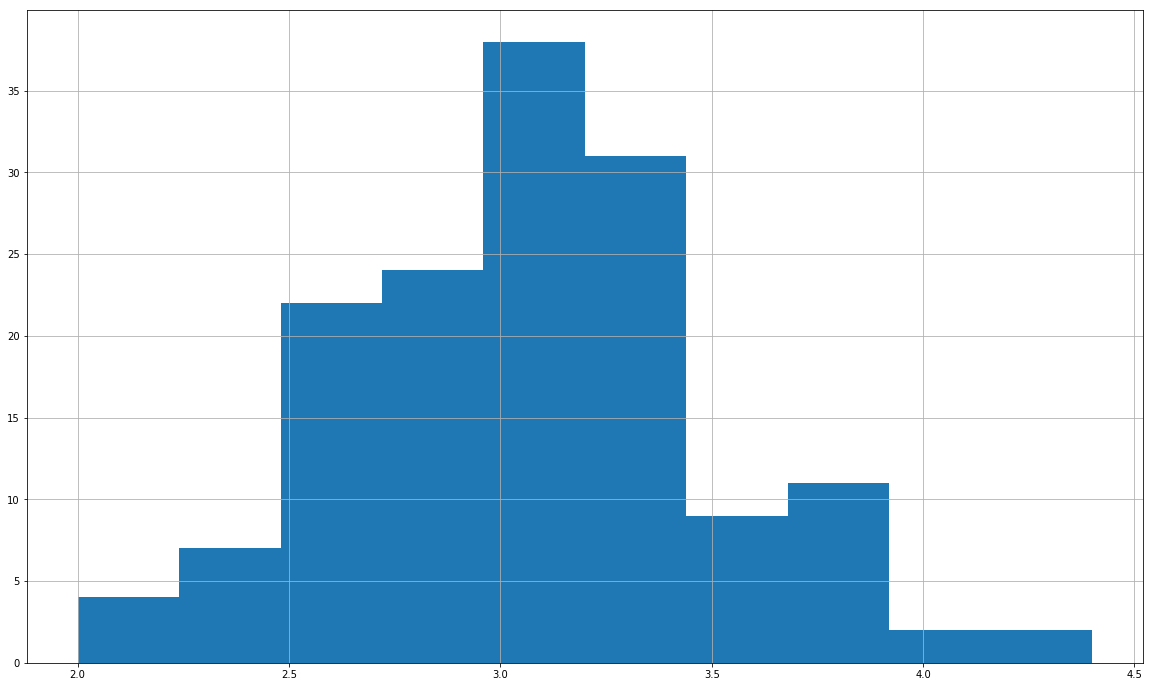

In [16]:
df['SepalWidthCm'].hist()

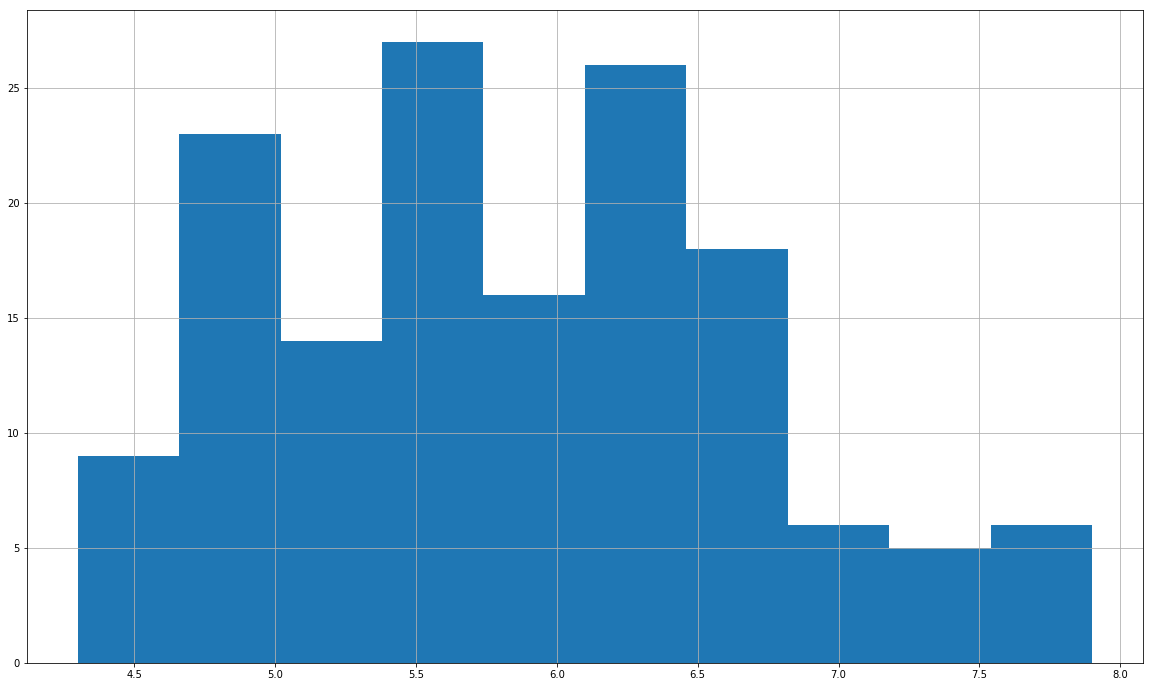

In [17]:
df['SepalLengthCm'].hist()

### Distintos órdenes de magnitud

In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Los ordenes de magnitud no son muy distintos, así que no hace falta hacer nada aquí

### Datos categóricos

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


El campo `Species` es de tipo object, así que habrá que pasarlo a valores categóricos

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
print(le.classes_)

df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Selección de variables

Muestra la matriz de correlación de las variables

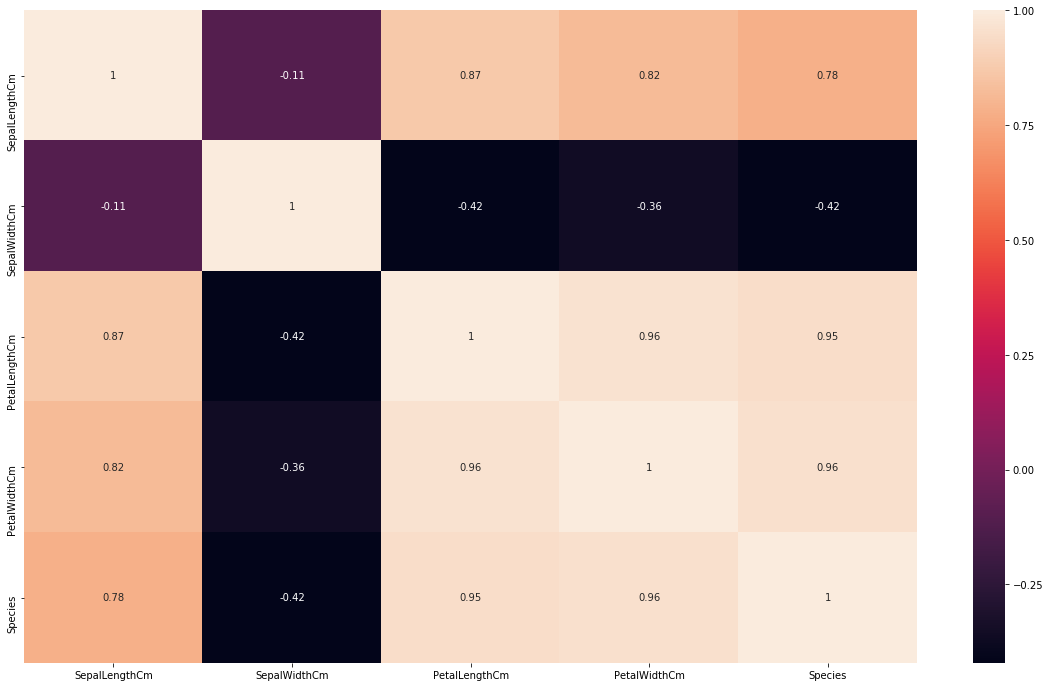

In [21]:
sns.heatmap(df.drop(['Id'], 1).corr(), annot=True)

Para este ejemplo, nos vamos a quedar solo con las variables `SepalLengthCm` y `SepalWidthCm` (además de la `Species`) para poder representar los datos en gráficos de 2d

In [22]:
df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm'], 1, inplace =True)
df.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


# Entrenando los modelos

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'], 1), df.Species)

Separa el dataset de entrenamiento en train y test

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("Species", axis=1).values
y = df["Species"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aquí almacenaremos el rendimiento de cada algoritmo para su posterior comparación
algorithm_accuracy = []

Aquí tenemos una clase que podemos utilizar luego para visualizar las áreas de decisión. No tienes que hacer nada de momento con ella, sólo ejecutarla

In [25]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    h = (x_max / x_min)/100
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    
                         np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    
    plt.show()

## Regresión logística

Aplica una regresión logística a los datos, usando la clase
```python
from sklearn.linear_model import LogisticRegression
```

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(solver='liblinear', multi_class='auto')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(le.classes_)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
0.8333333333333334
[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]


**Áreas de decisión**

Utiliza la función `plotSVC` para pintar las áreas de decisión del modelo que acabas de entrenar


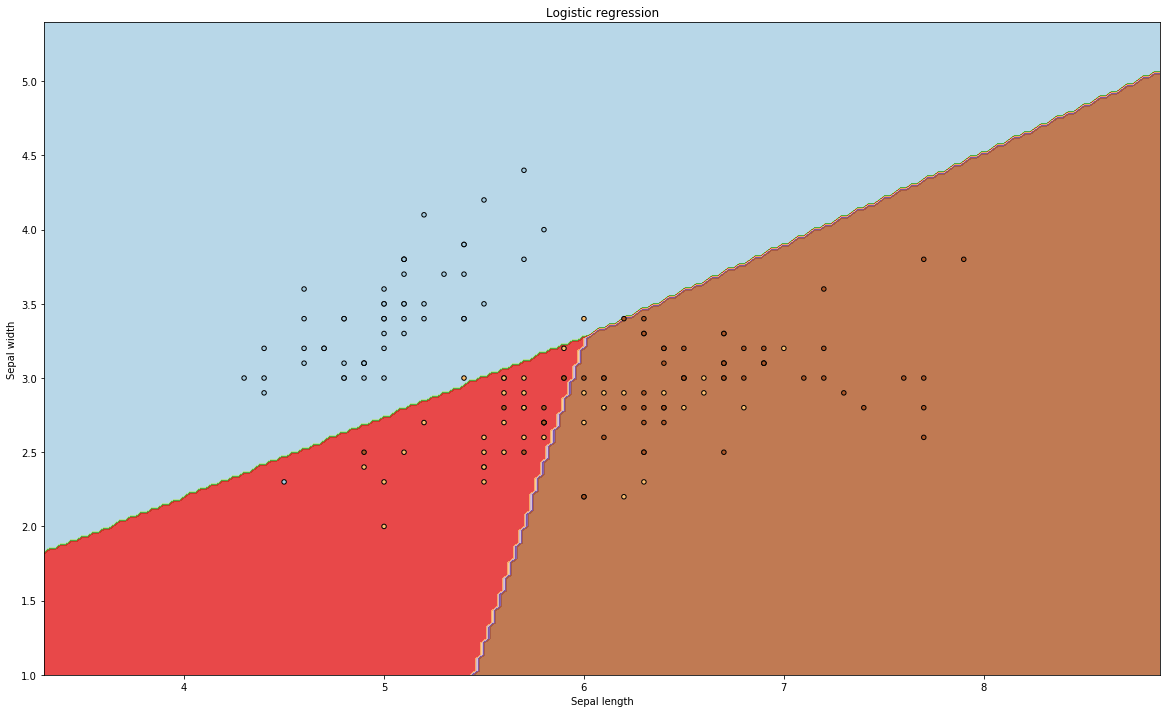

In [27]:
svc = logreg
plotSVC('Logistic regression')

Prueba con distintas combinaciones de parámetros y pinta los resultados.

Las variables que te aconsejo probar son:
```python
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
```

/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


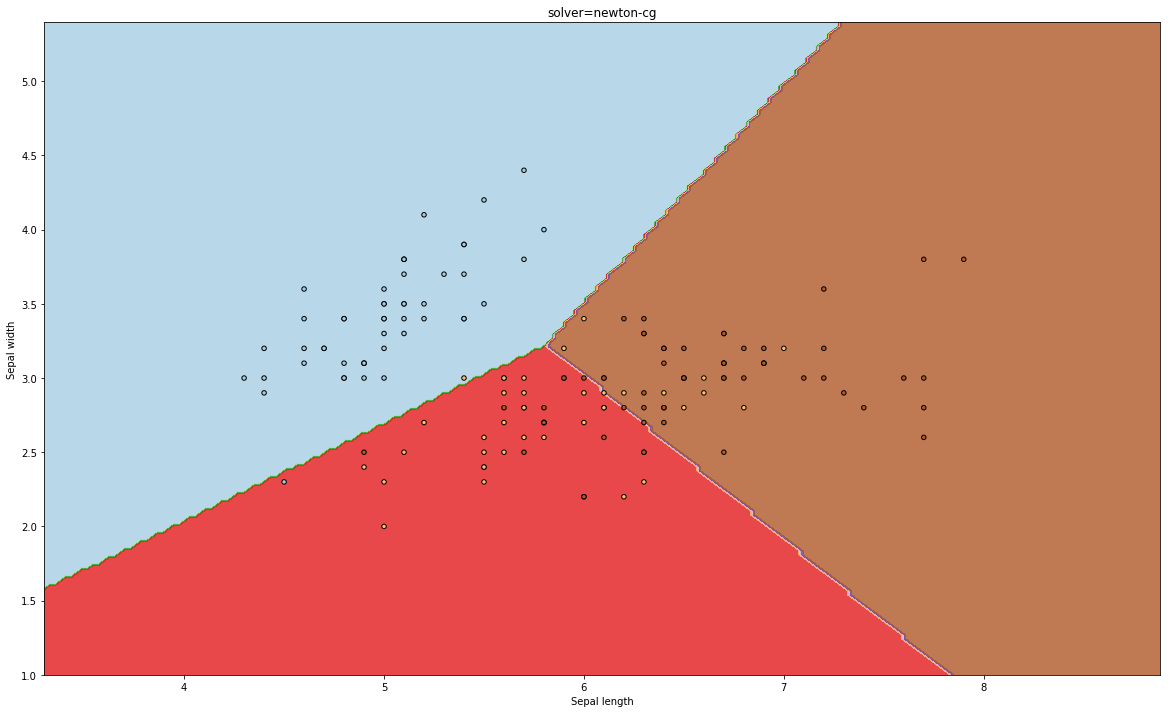

0.9333333333333333
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


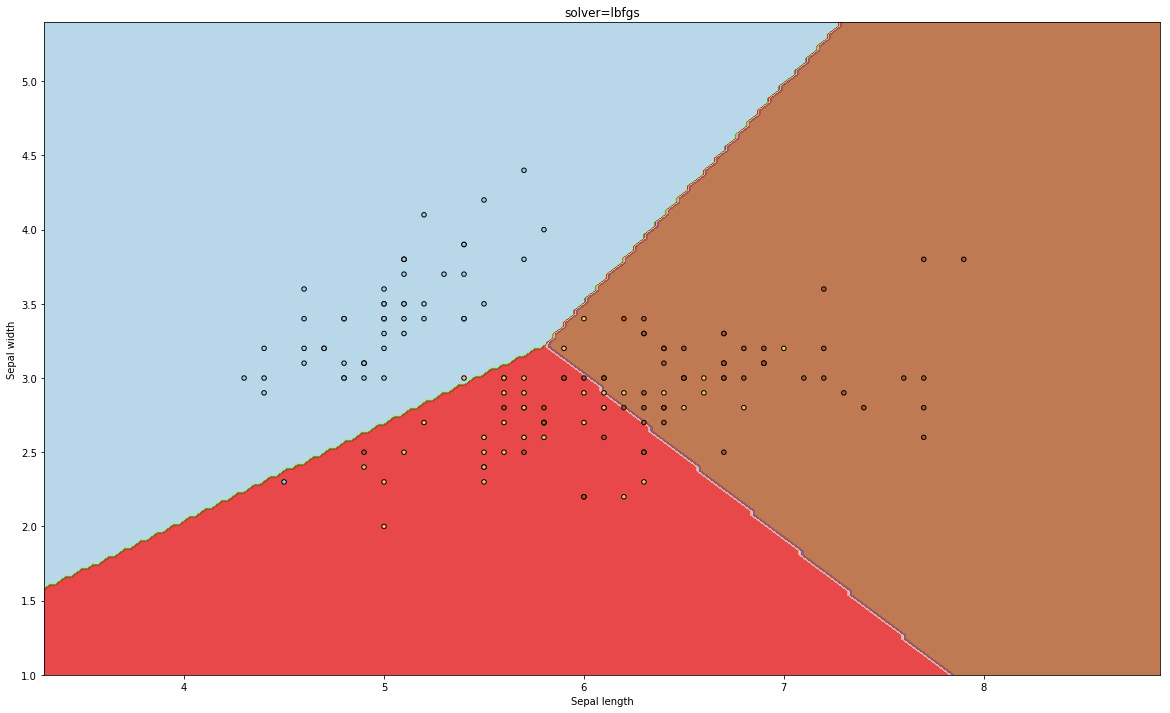

0.9333333333333333
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


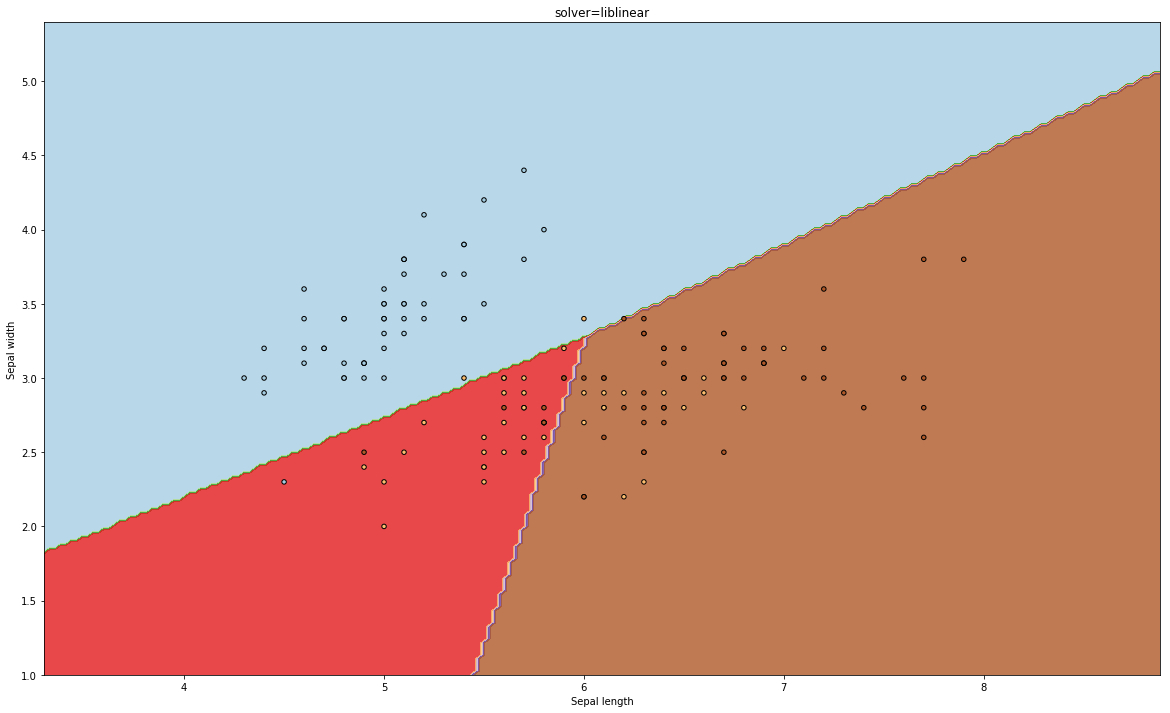

0.8333333333333334
[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


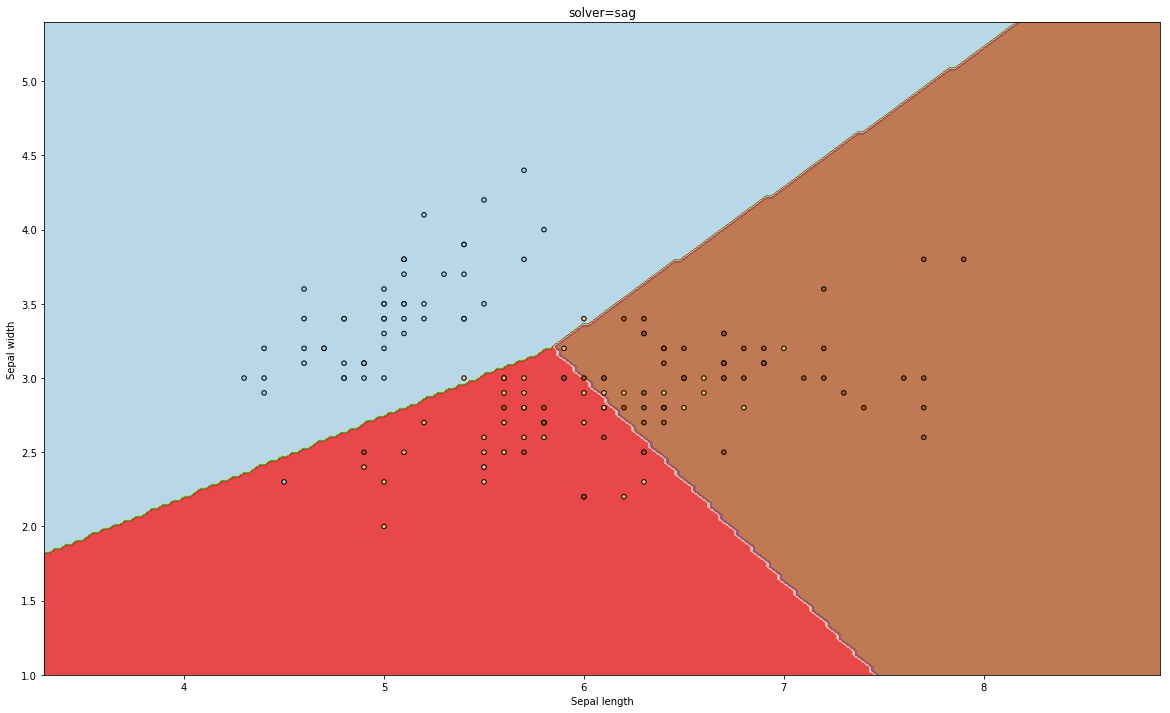

0.9333333333333333
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


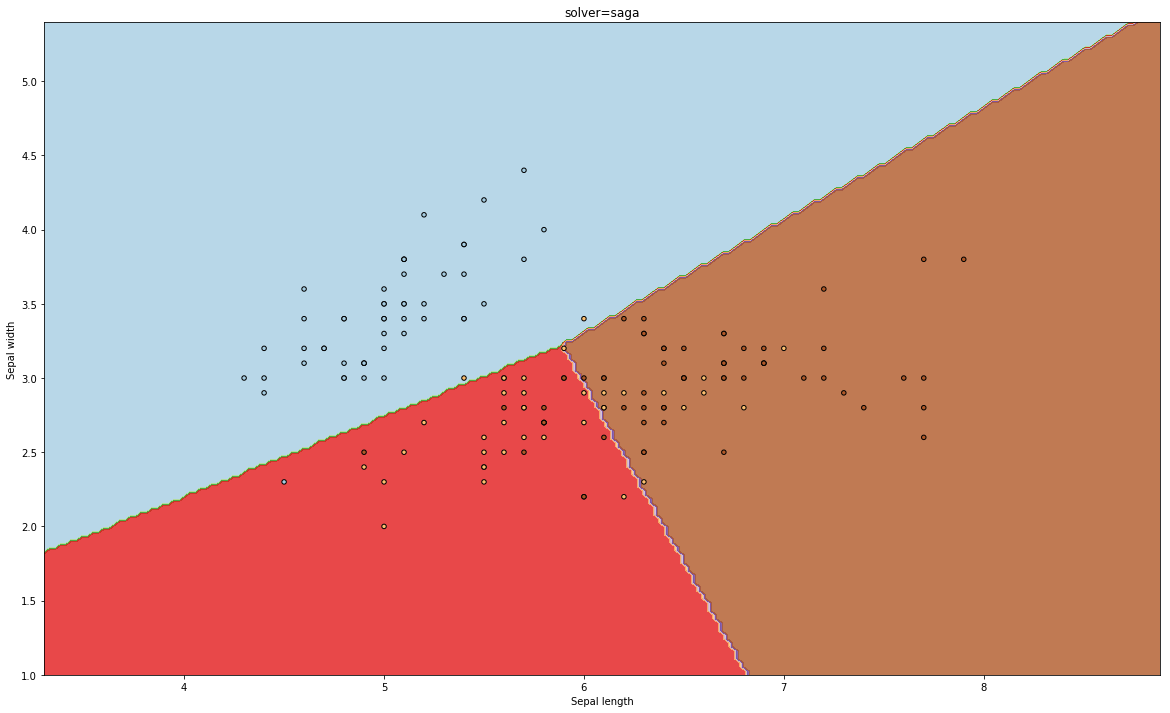

0.9
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


In [28]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solvers:
    svc = LogisticRegression(solver=solver).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    plotSVC(f'solver={solver}')
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

**Grid search**

A continuación prueba el grid search con el siguiente `param_grid`
```python
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}
```

In [29]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}

# Create a based model
rf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'multi_class': 'auto', 'solver': 'newton-cg'}
Accuracy score:  
 0.9
Confusion matrix: 
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Naïve Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((gaussian, accuracy))

Accuracy score:  
 0.9
Confusion matrix: 
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


**Áreas de decisión**

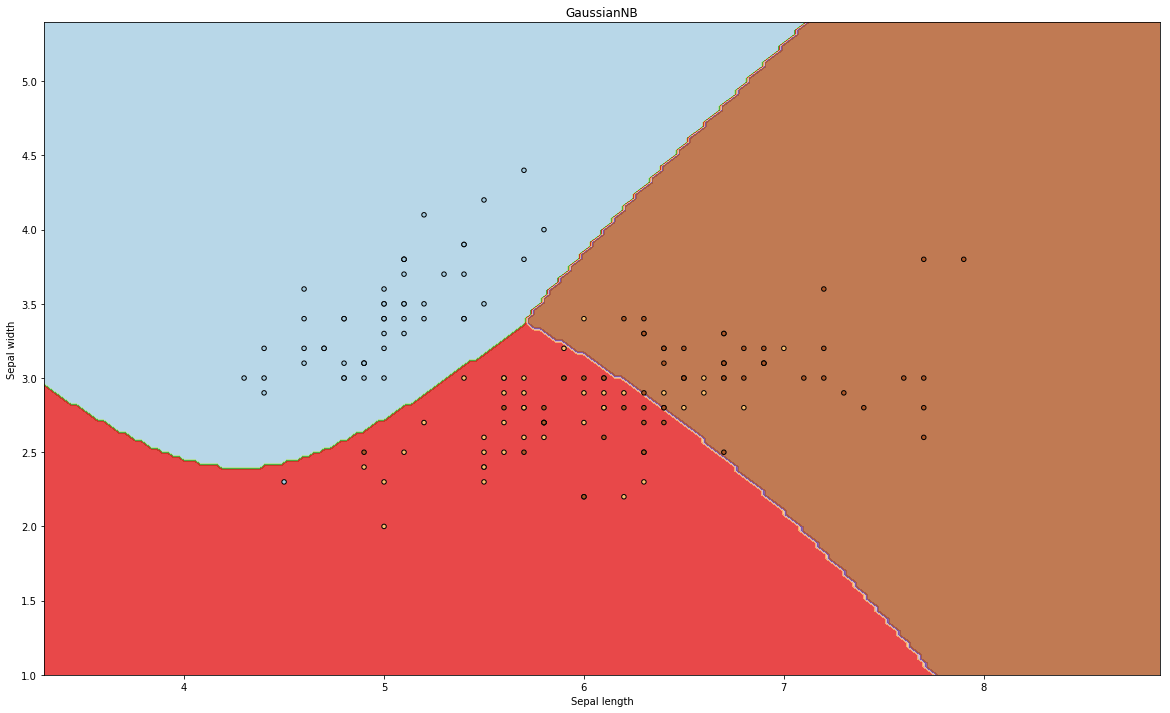

In [31]:
svc = GaussianNB().fit(X_train, y_train)  
plotSVC('GaussianNB')

## Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6333333333333333
[[9 1 0]
 [0 4 5]
 [0 5 6]]


**Áreas de decisión**

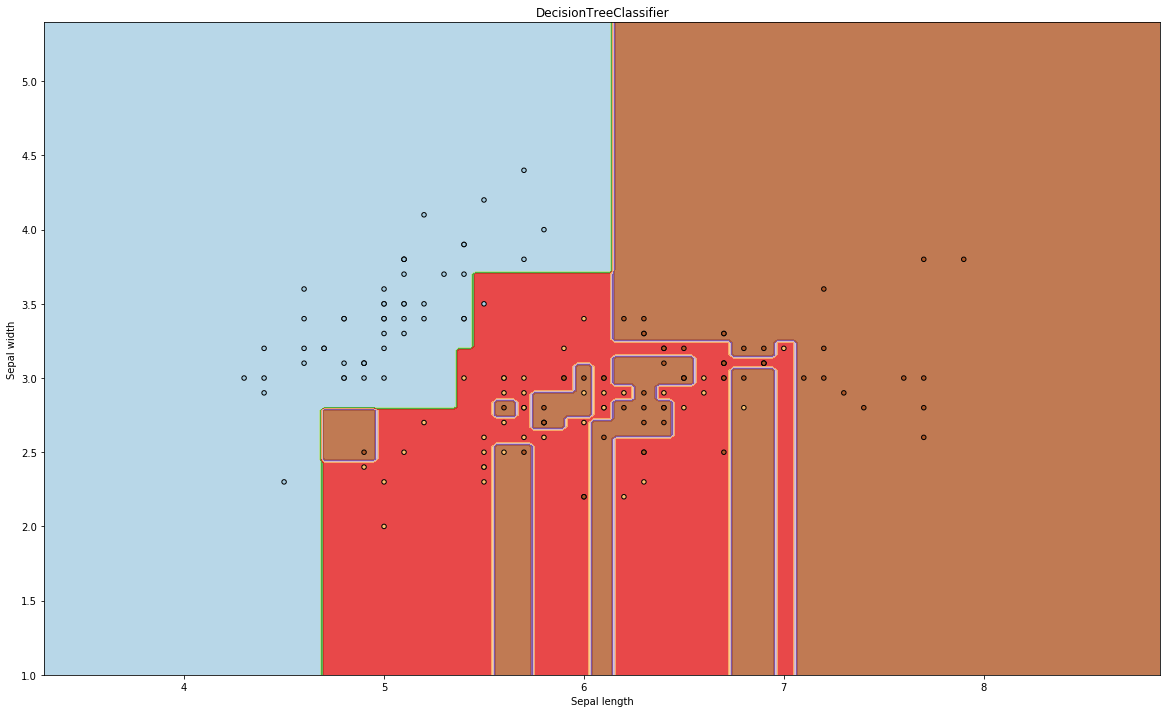

In [58]:
svc = DecisionTreeClassifier().fit(X_train, y_train)  
plotSVC('DecisionTreeClassifier')

**Grid search**

In [34]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': range(10,500,20),
    'max_depth': range(1,20,2),
}

# Create a based model
dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'max_depth': 3, 'min_samples_split': 10}
Accuracy score:  
 0.8333333333333334
Confusion matrix: 
 [[ 9  1  0]
 [ 0  6  3]
 [ 0  1 10]]


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    0.4s finished
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8
[[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


**Importancia de las features**

En random forest podemos visualizar la importancia que ha tenido cada features en el entrenamiento. Visualiza los resultados en una tabla y en un gráfico de barras

In [36]:
importances = pd.DataFrame(
    {'feature':df.drop("Species", axis=1).columns,
     'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
SepalLengthCm,0.634
SepalWidthCm,0.366


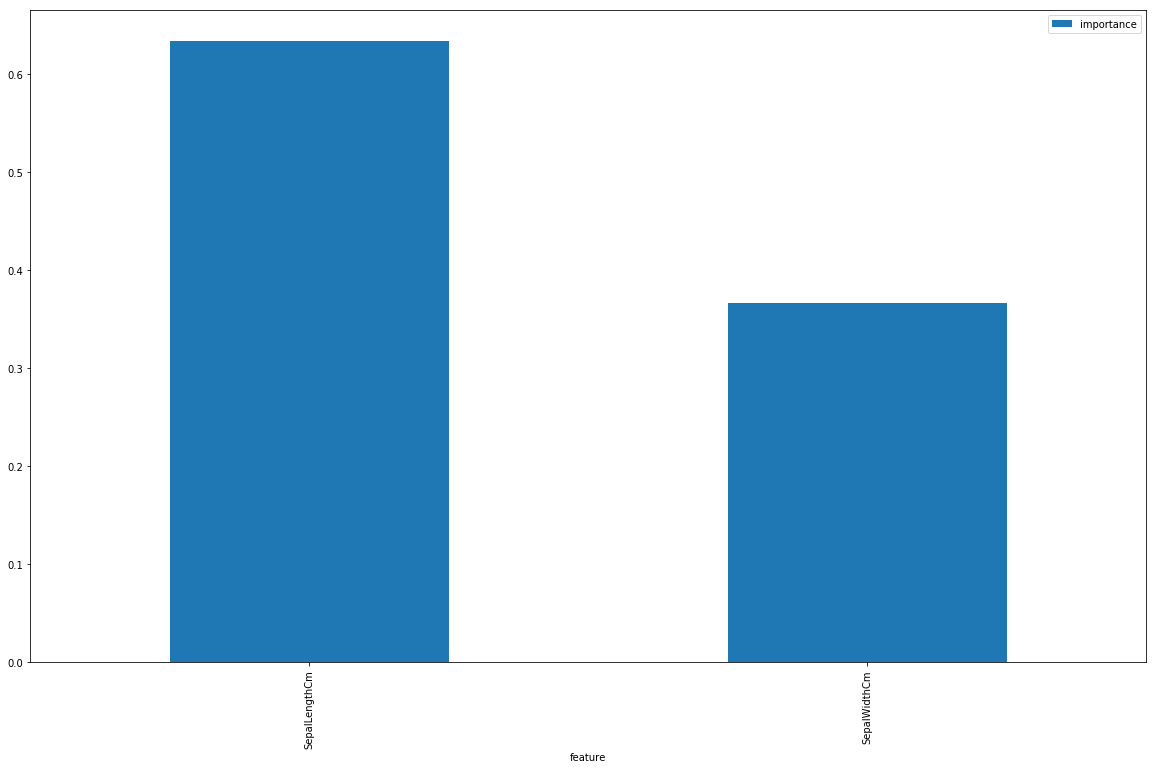

In [37]:
importances.plot.bar()

**Áreas de decisión**

/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


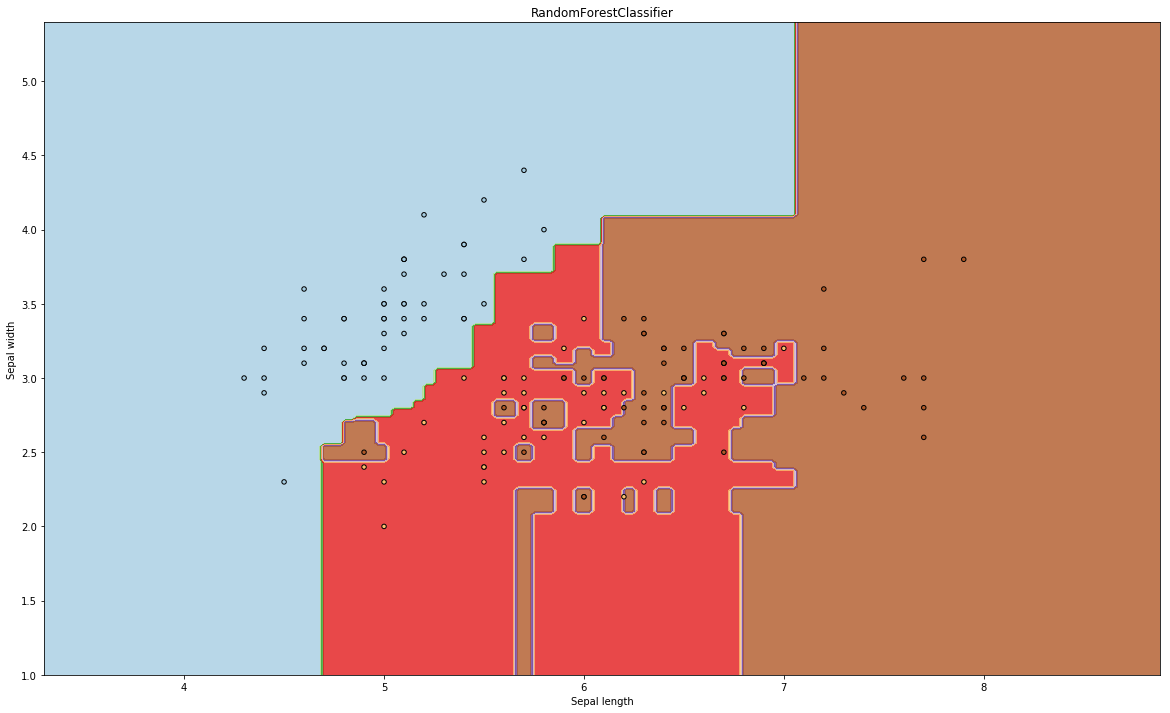

In [38]:
svc = RandomForestClassifier().fit(X_train, y_train)  
plotSVC('RandomForestClassifier')

**Grid search**

In [39]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1, 2],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1055 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:  3.6min


Best params: {'bootstrap': True, 'max_depth': 90, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy score:  
 0.8
Confusion matrix: 
 [[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  3.9min finished
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Support Vector Machine

In [40]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

linear_svc = SVC(gamma='auto')
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9

**Áreas de decisión**

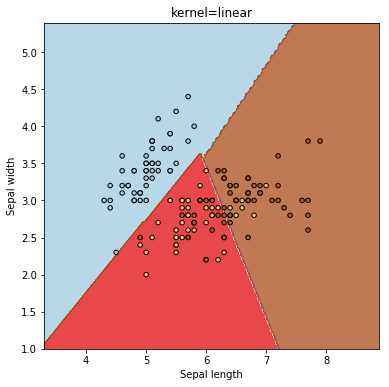

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


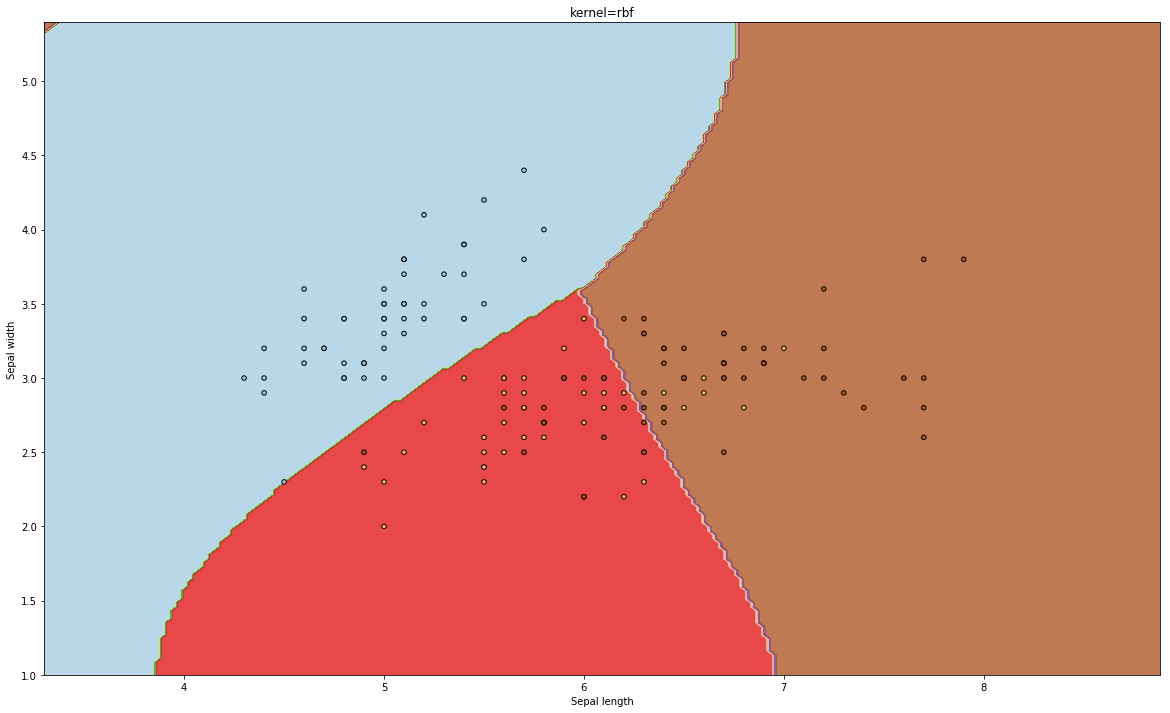

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


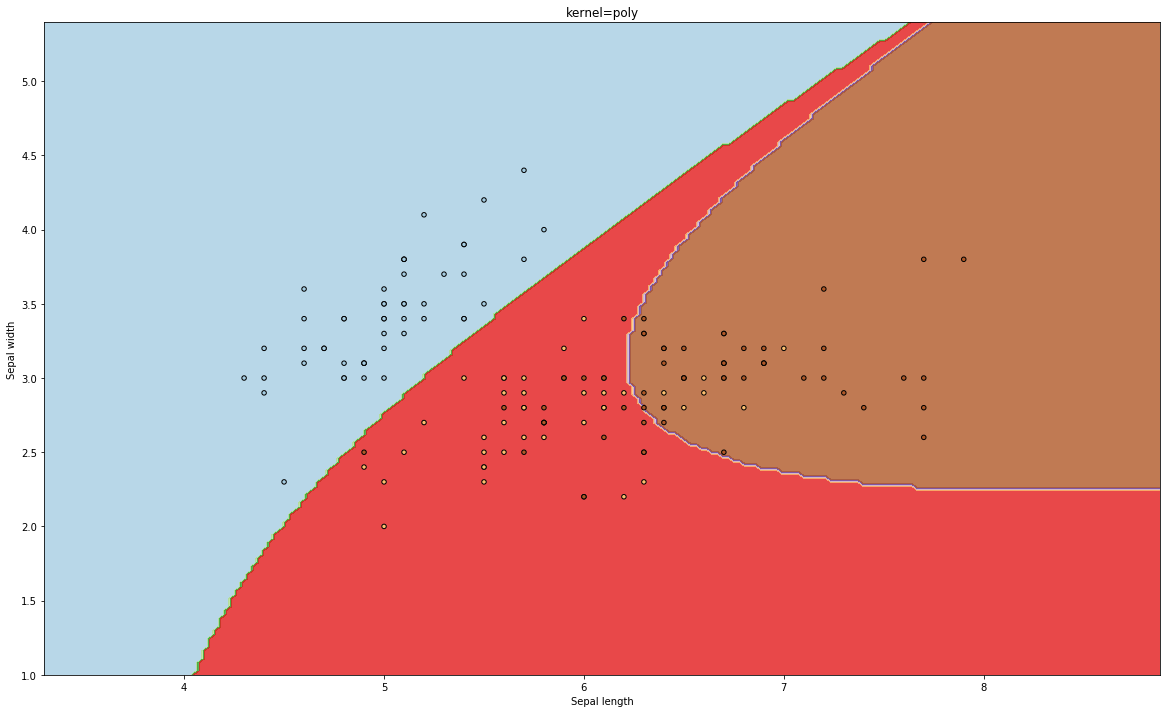

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [56]:
plt.figure(figsize=(6,6))
# Kernel parameters
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc = SVC(kernel=kernel, gamma='auto').fit(X, y)
    y_pred = svc.predict(X_test)
    plotSVC(f'kernel={kernel}')
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

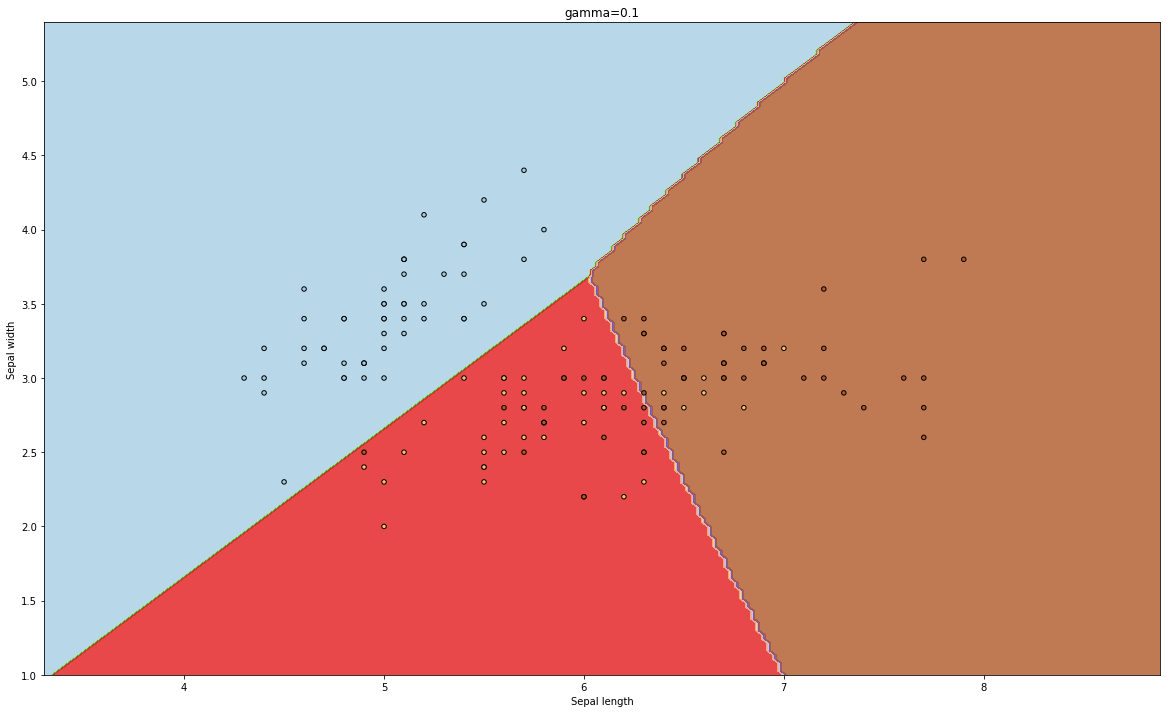

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


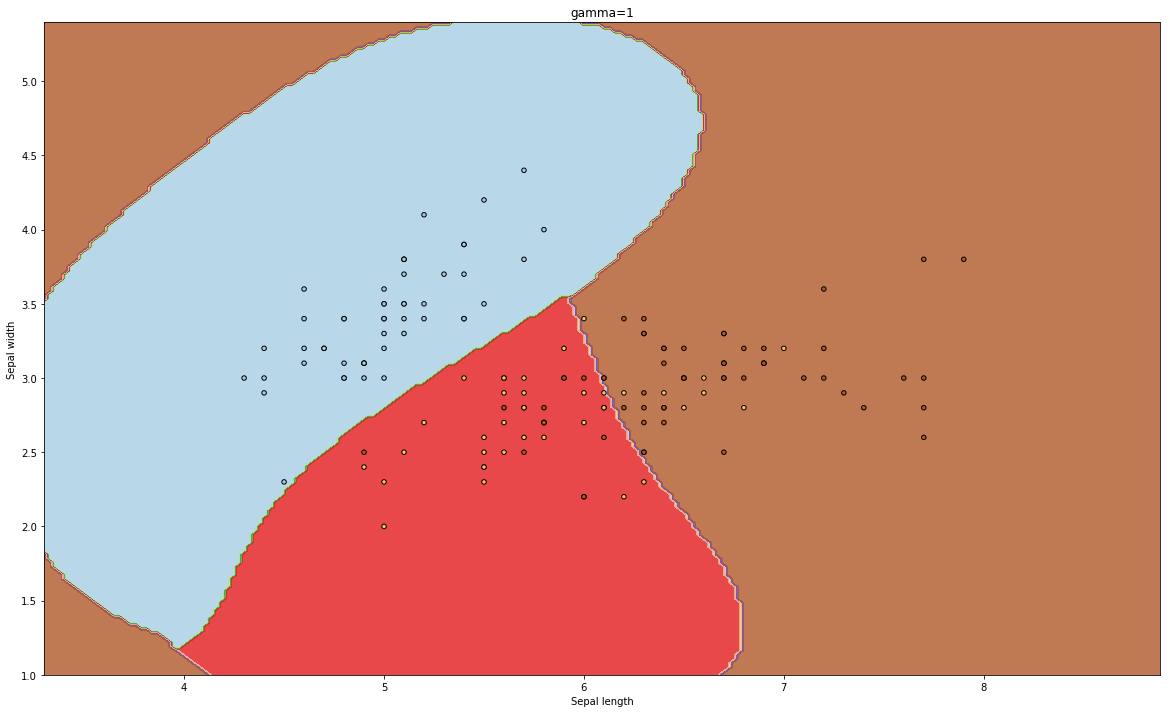

0.9333333333333333
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


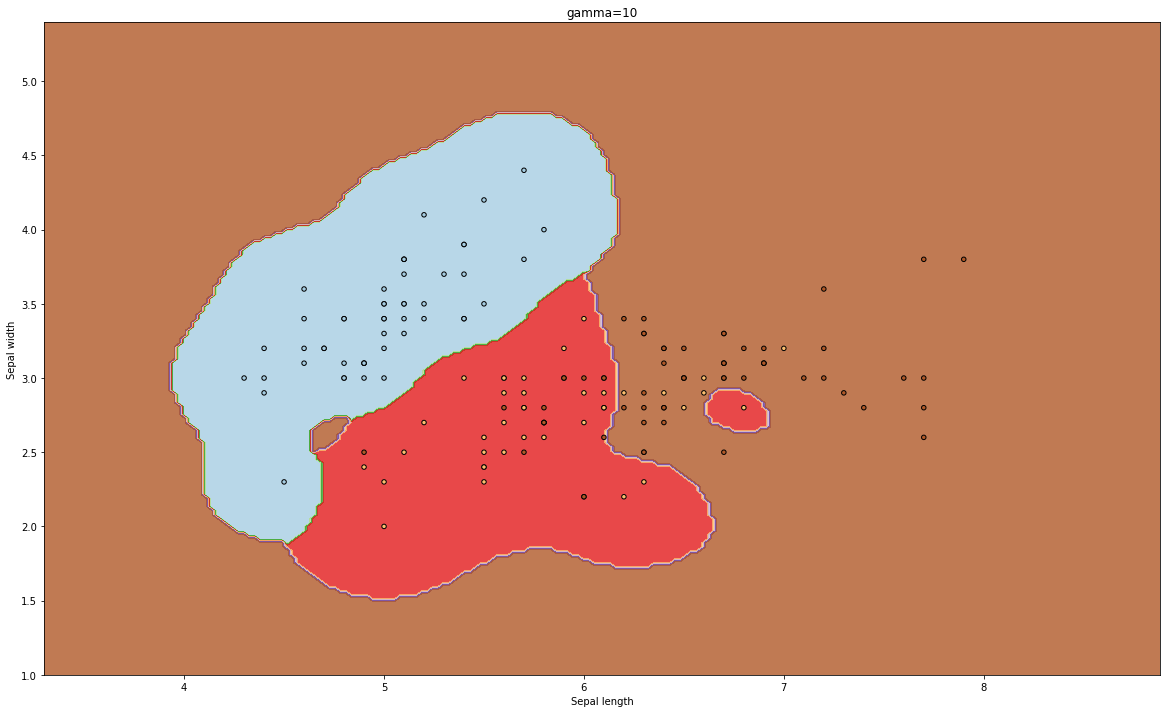

0.9333333333333333
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


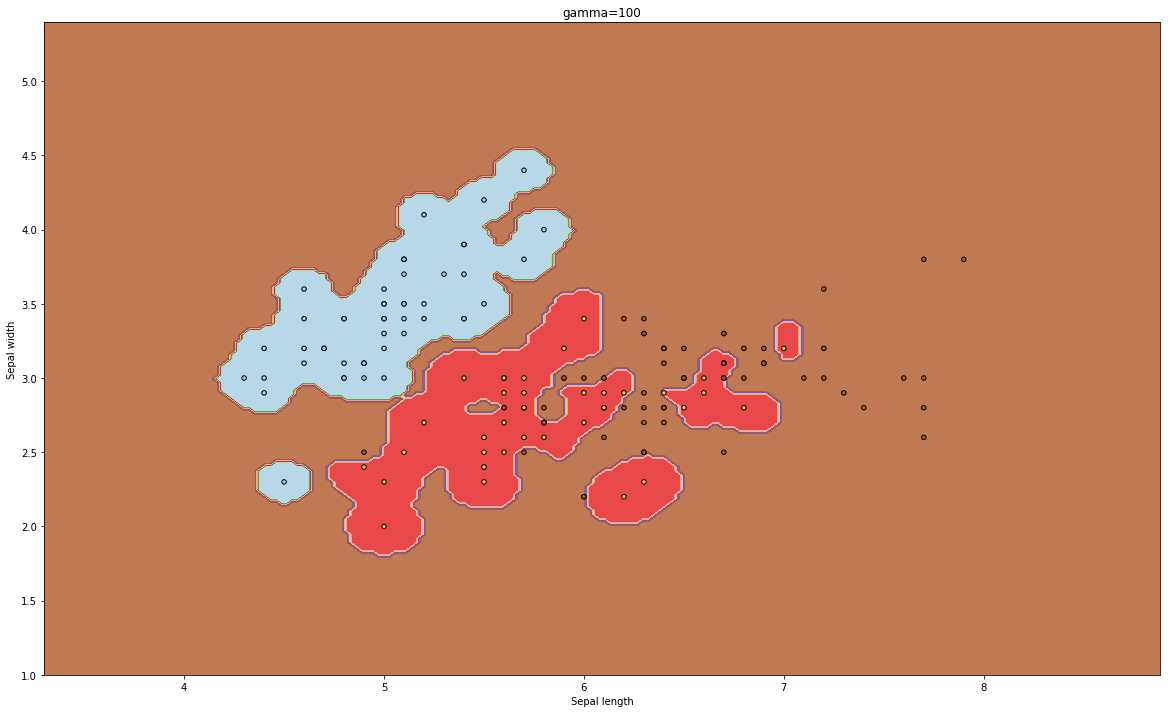

0.9333333333333333
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [42]:
# gamma is a parameter for non linear hyperplanes. 
# The higher the gamma value it tries to exactly fit the training data set

gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    svc = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC(f'gamma={gamma}')
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

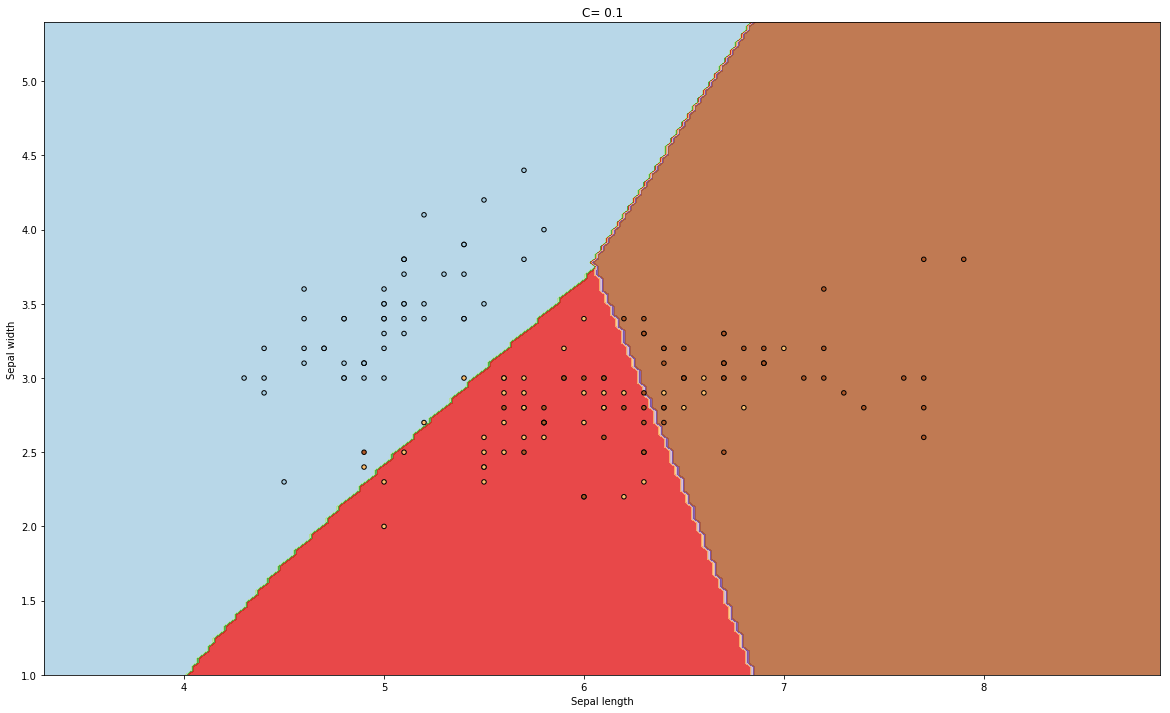

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


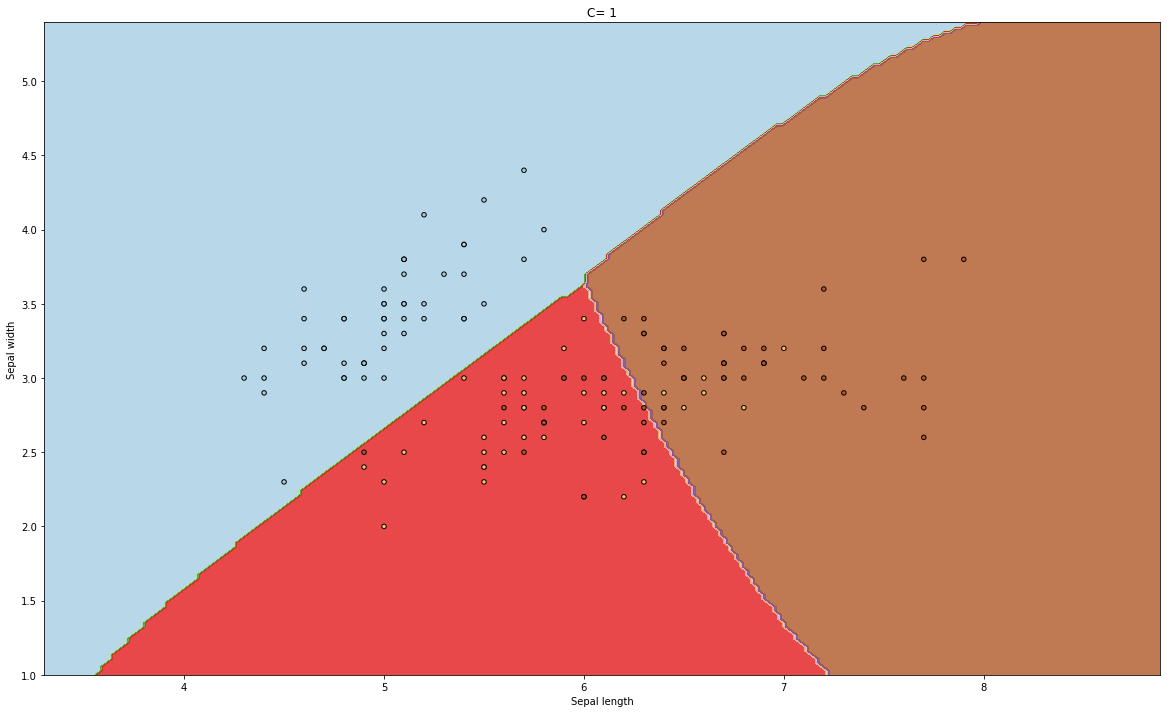

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


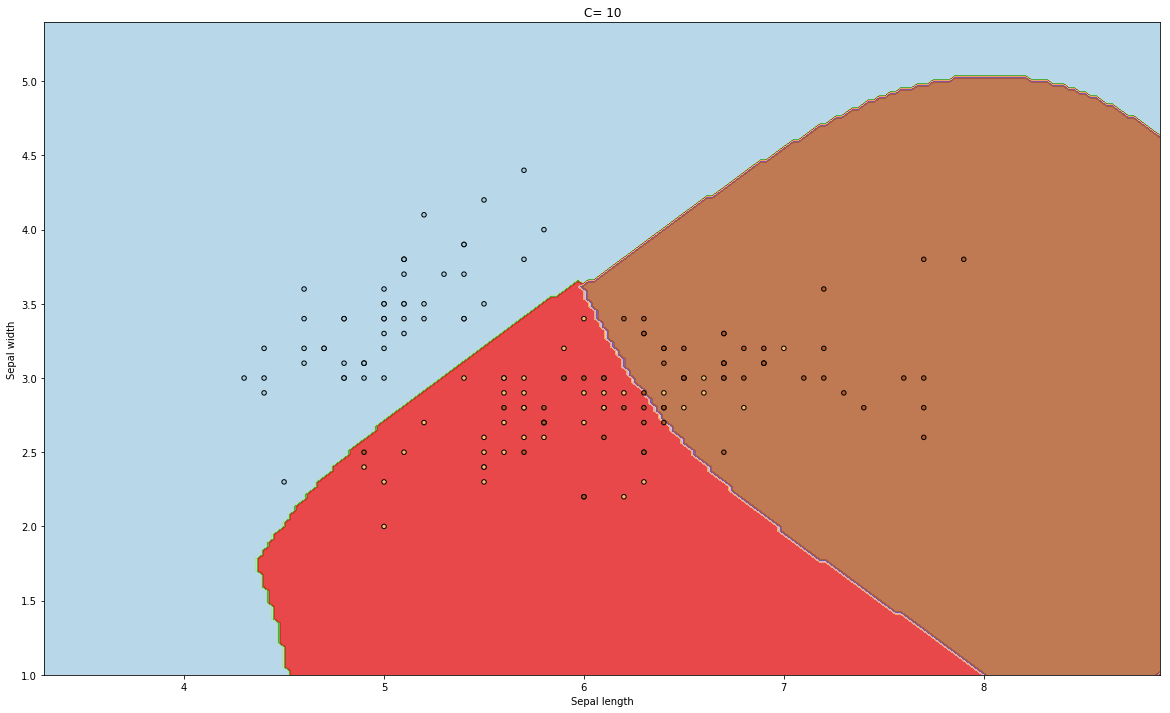

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


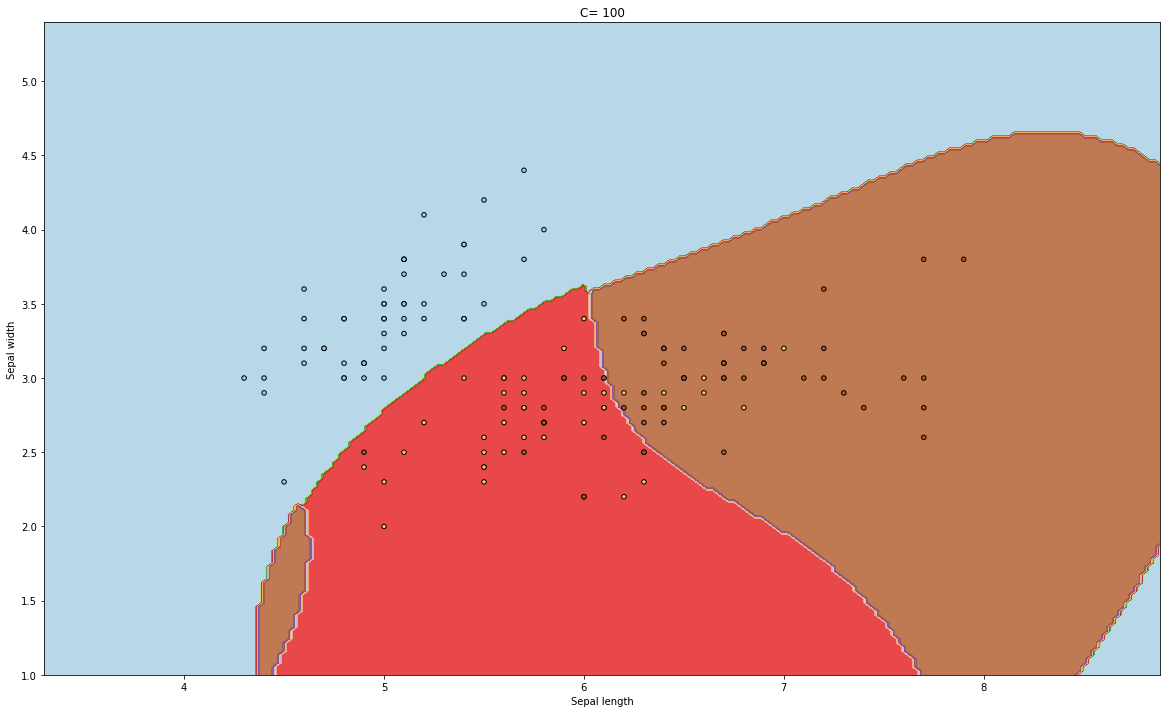

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


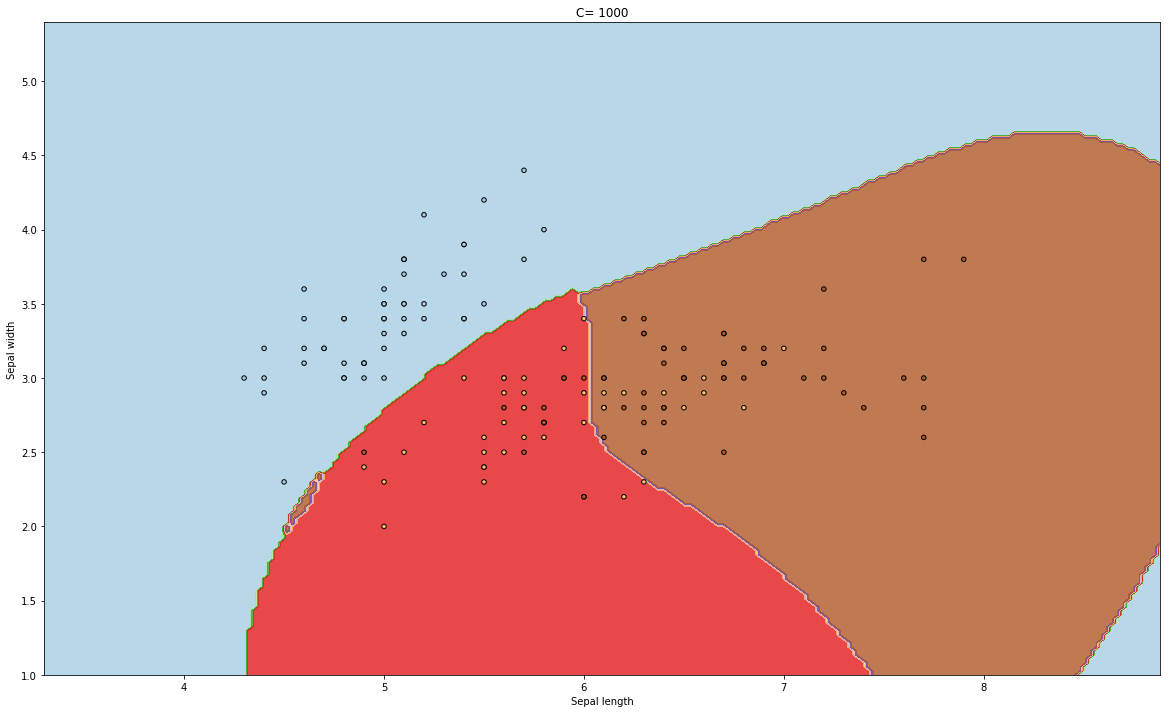

0.9
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


In [43]:
# C is the penalty parameter of the error term. 
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
# Increasing C values may lead to overfitting the training data.
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    svc = SVC(kernel='rbf', gamma='scale', C=c).fit(X, y)
    plotSVC(f'C= {c}')    
    
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

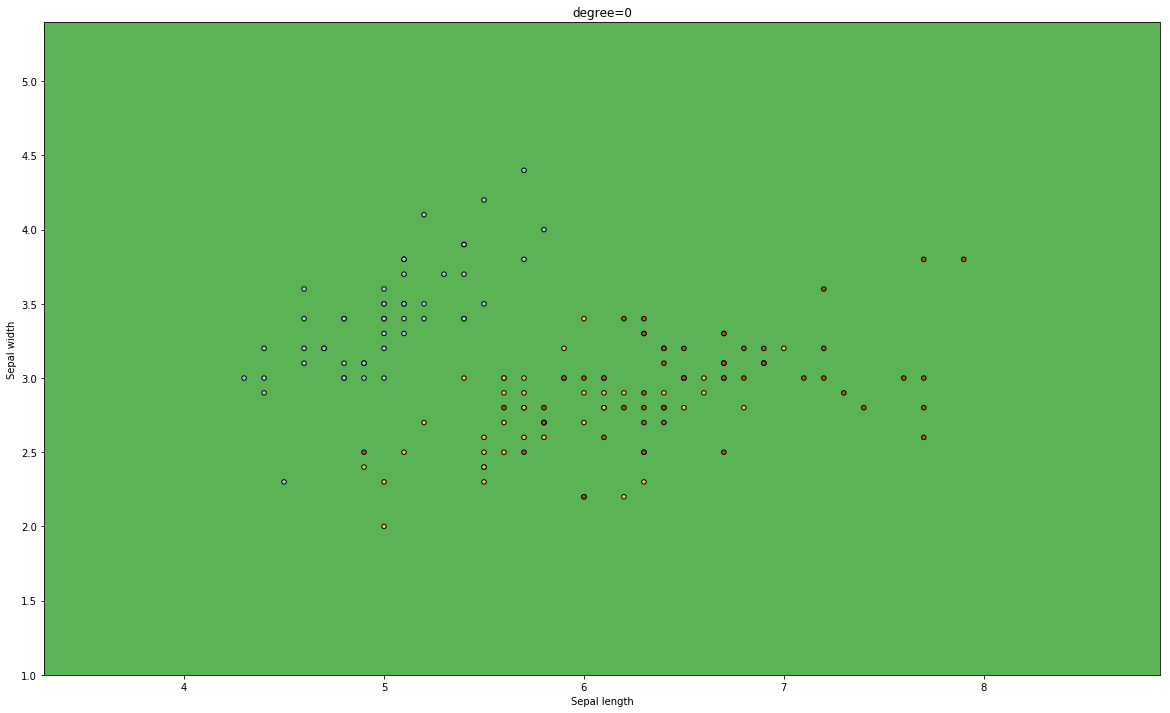

0.36666666666666664
[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]


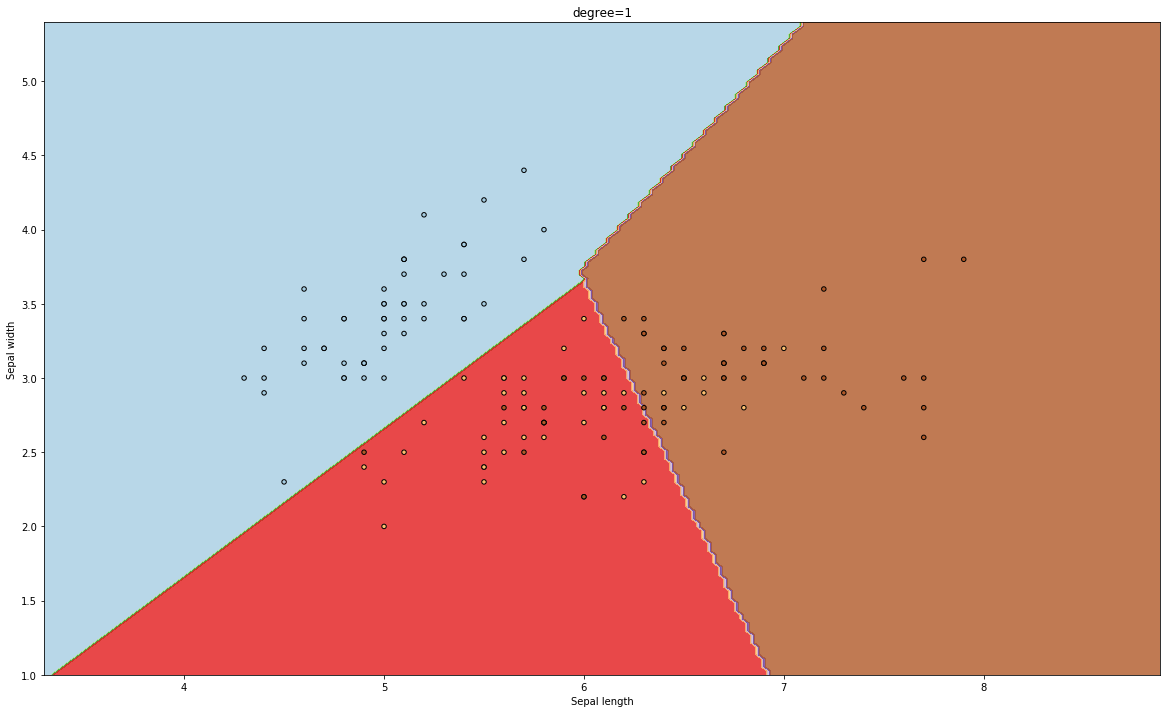

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


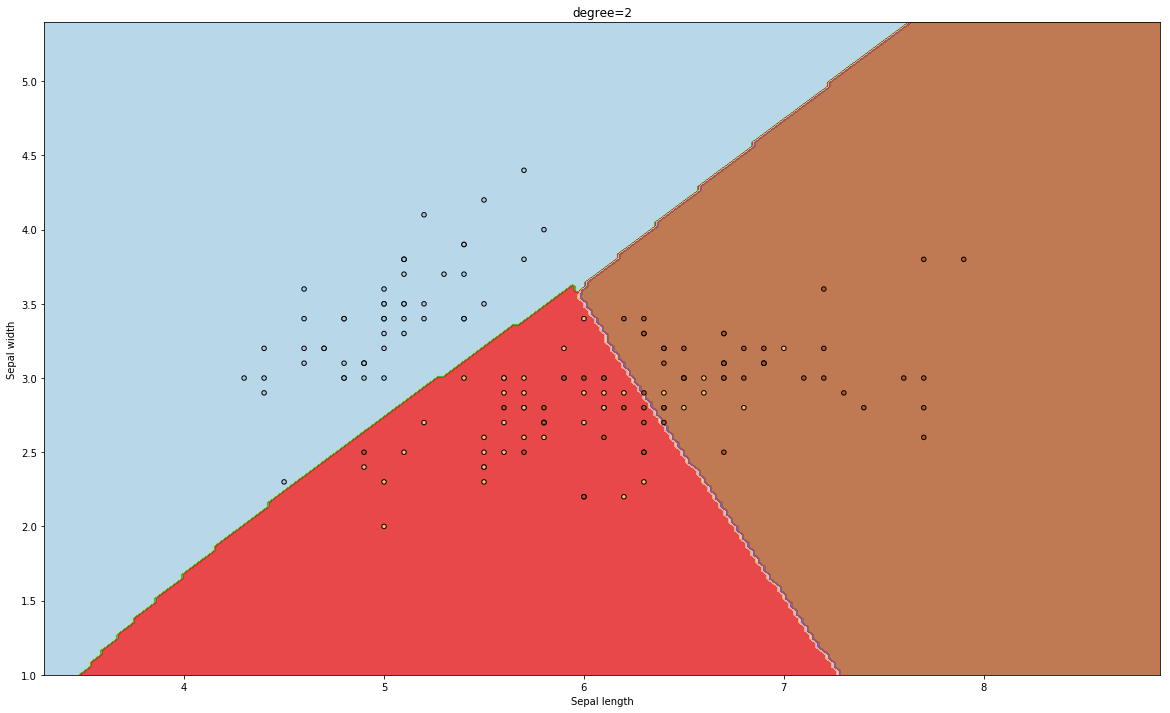

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


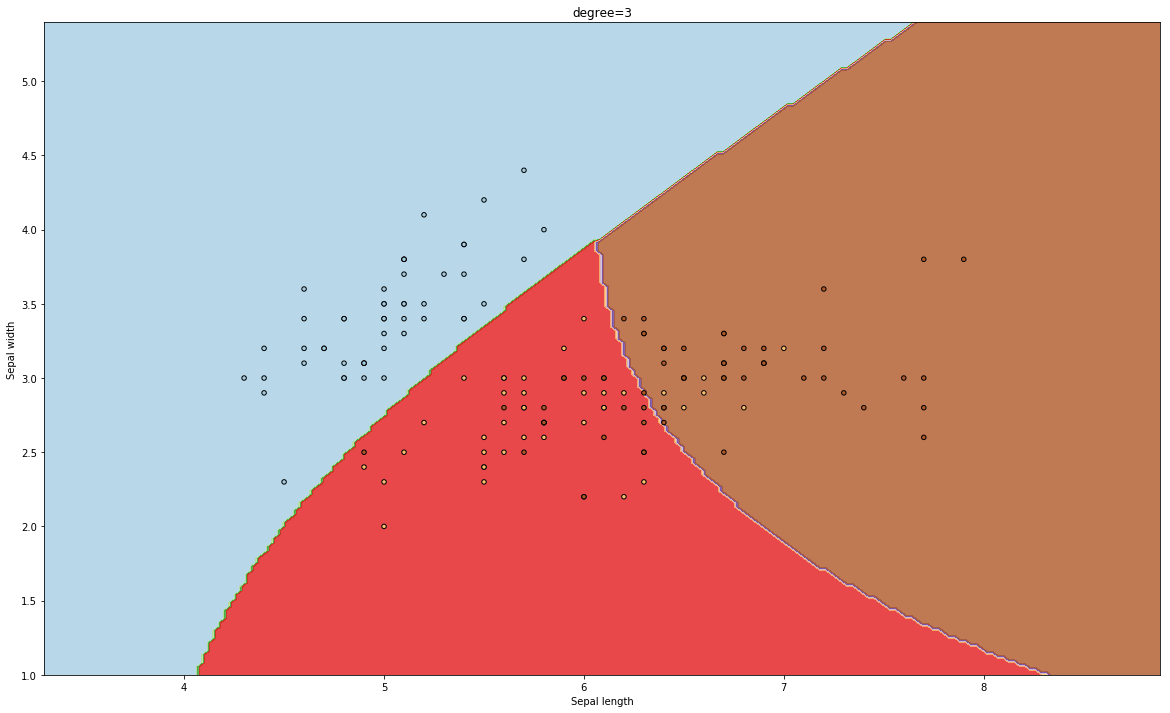

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


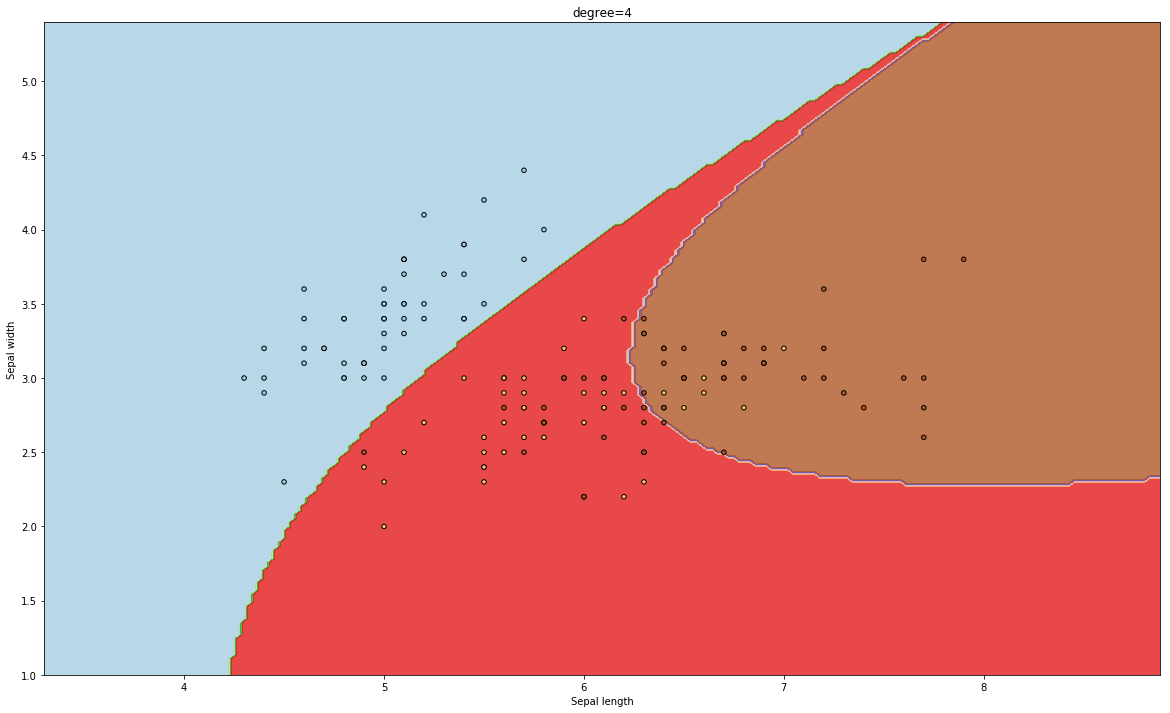

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


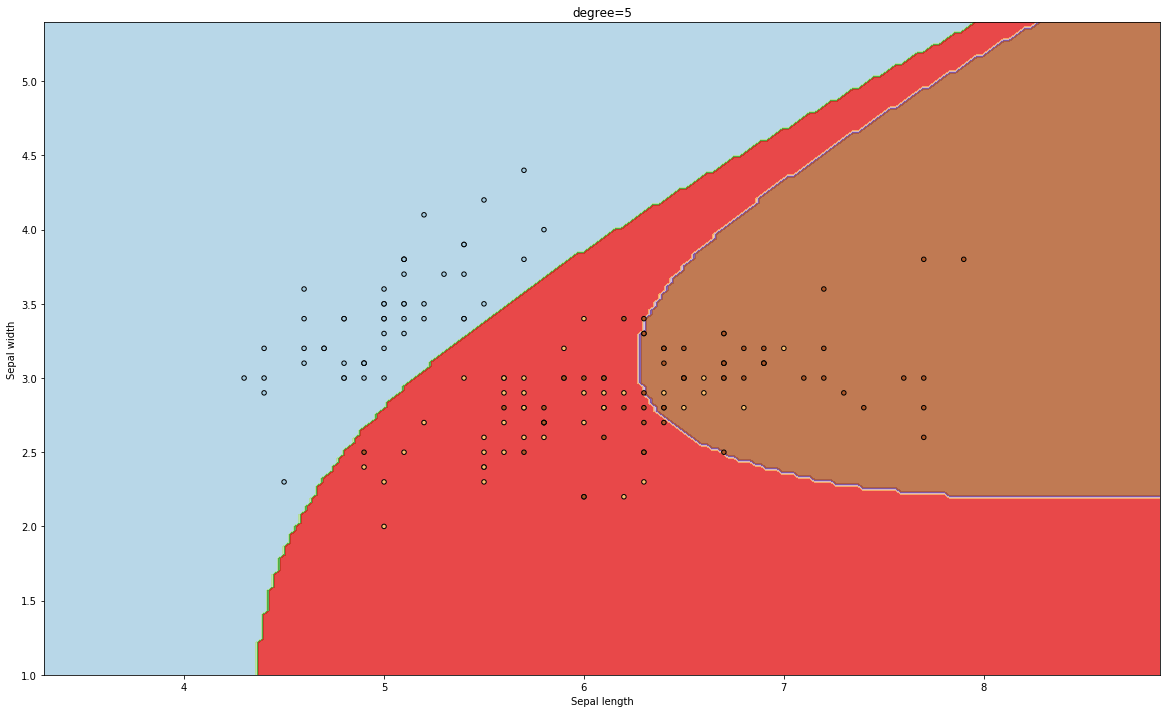

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


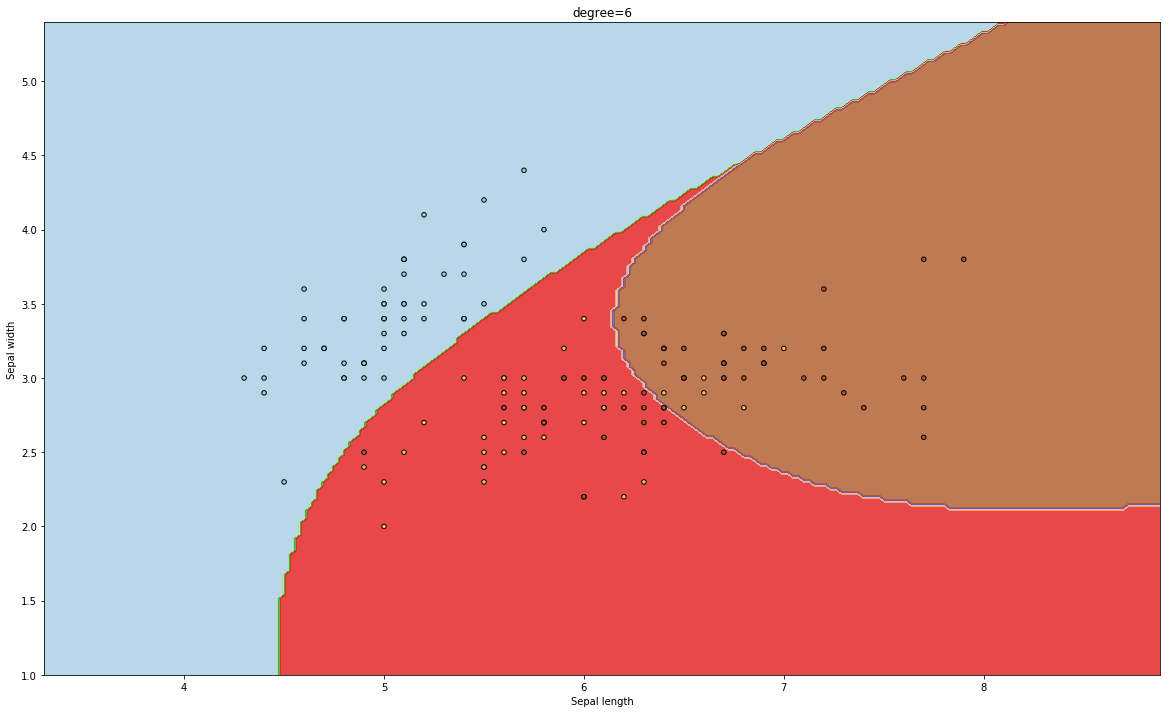

0.8
[[10  0  0]
 [ 0  7  2]
 [ 0  4  7]]


In [44]:
# degree is a parameter used when kernel is set to ‘poly’. 
# It’s basically the degree of the polynomial used to find the hyperplane to split the data.
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    svc = SVC(kernel='poly', gamma='scale', degree=degree).fit(X, y)
    plotSVC(f'degree={degree}')
        
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

**Grid search**

In [45]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [0, 1, 2, 3, 4, 5, 6],
}
# Create a based model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  2.8min finished
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params: {'C': 0.001, 'degree': 6, 'gamma': 1, 'kernel': 'poly'}
Accuracy score:  
 0.9
Confusion matrix: 
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


## K Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

accuracy_score(y_test, y_pred)

0.8

**Obteniendo el valor de K**

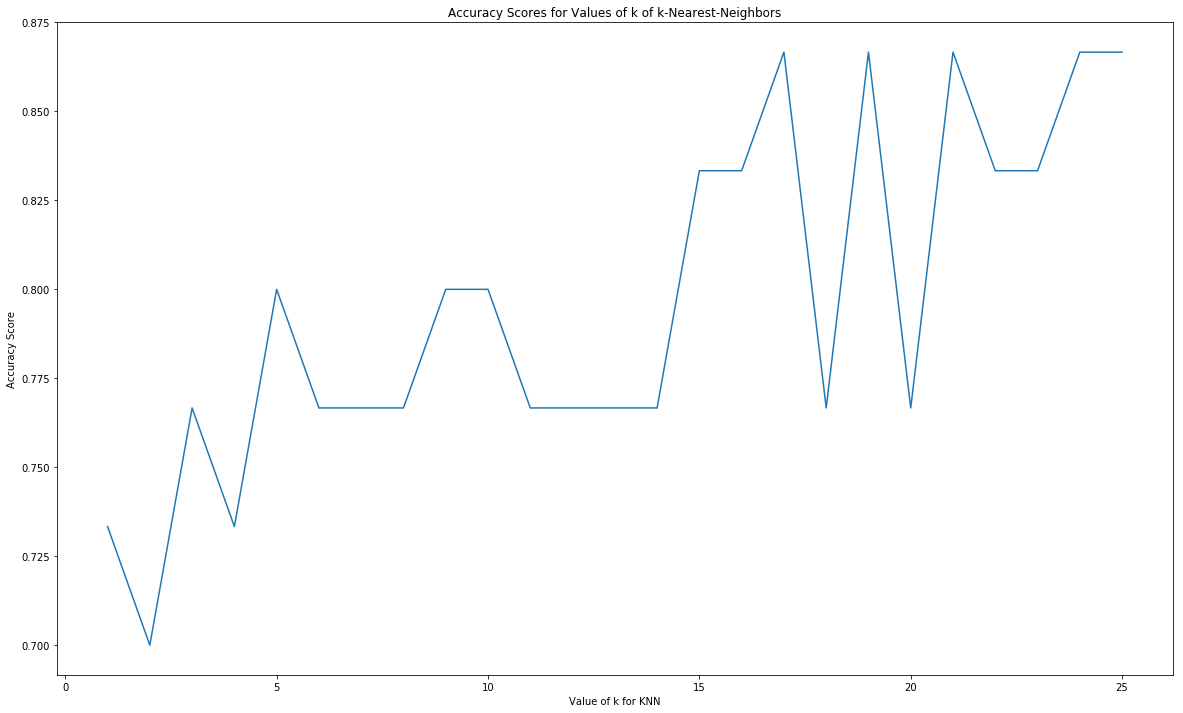

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 12) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

accuracy_score(y_test, y_pred)

0.7666666666666667

**Áreas de decisión**

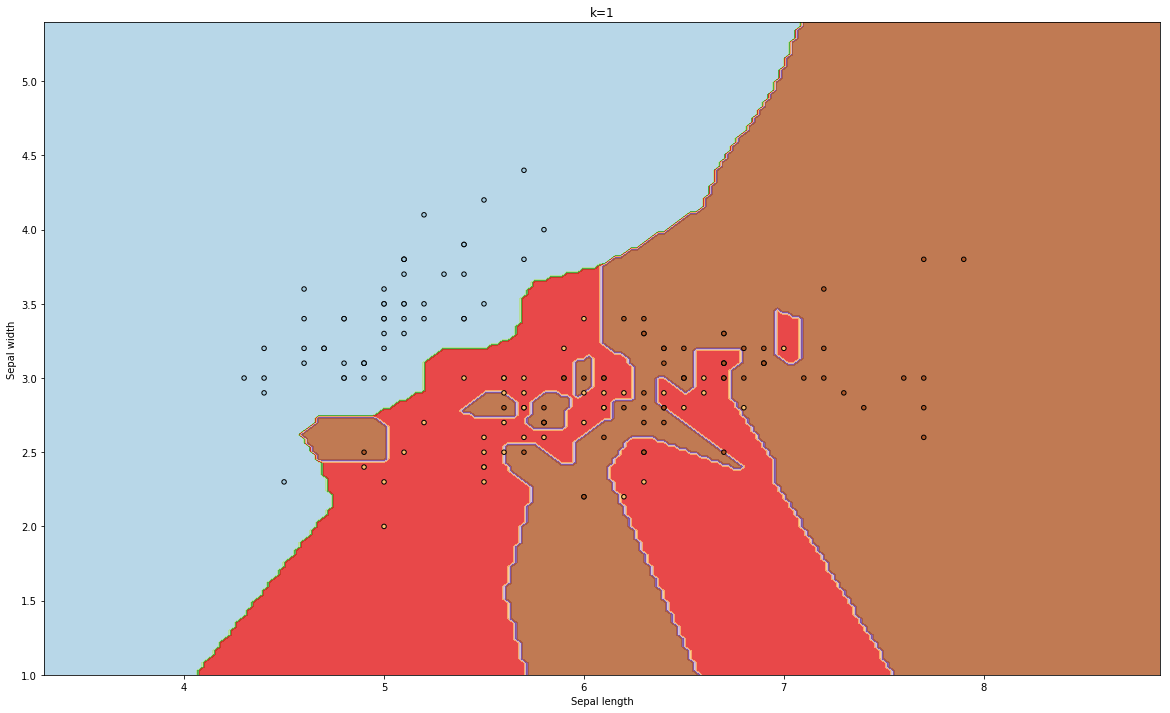

0.7333333333333333
[[10  0  0]
 [ 0  6  3]
 [ 0  5  6]]


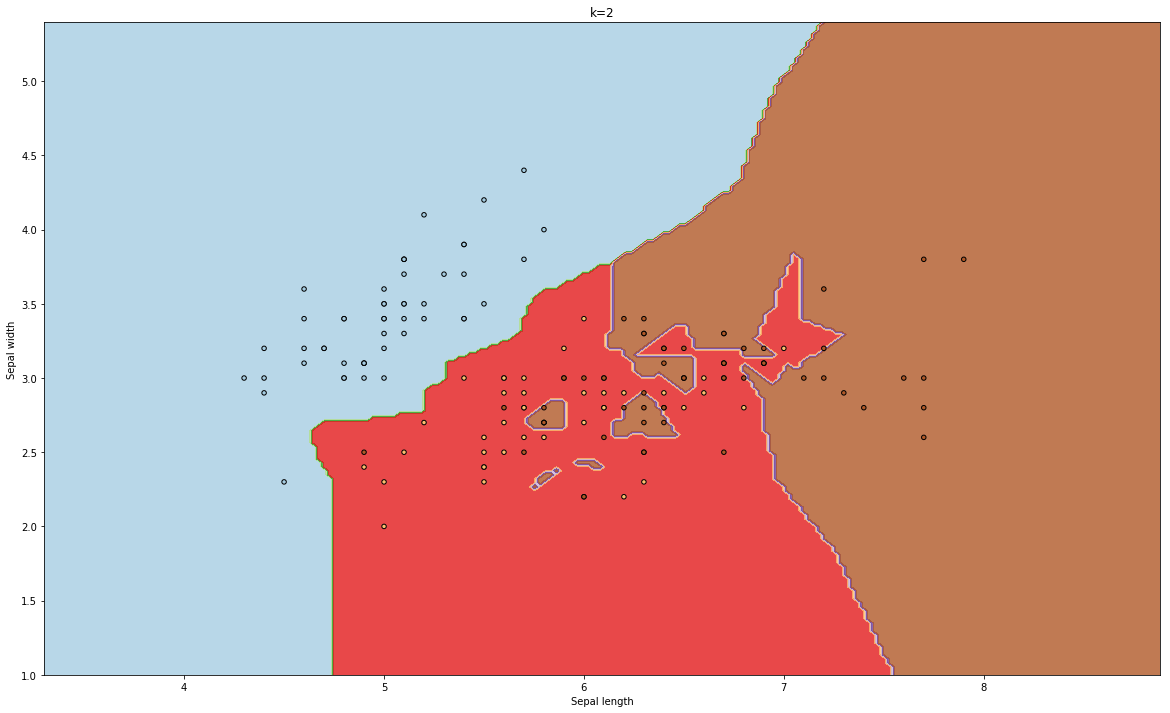

0.7
[[10  0  0]
 [ 0  7  2]
 [ 0  7  4]]


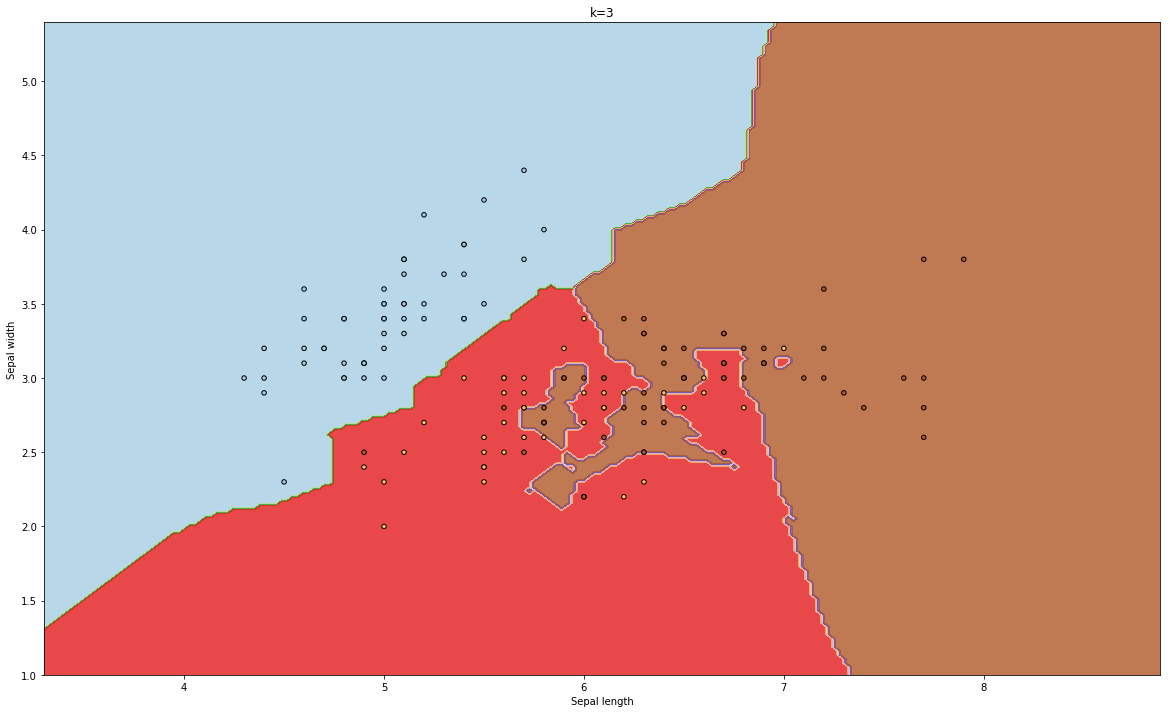

0.7666666666666667
[[10  0  0]
 [ 0  7  2]
 [ 0  5  6]]


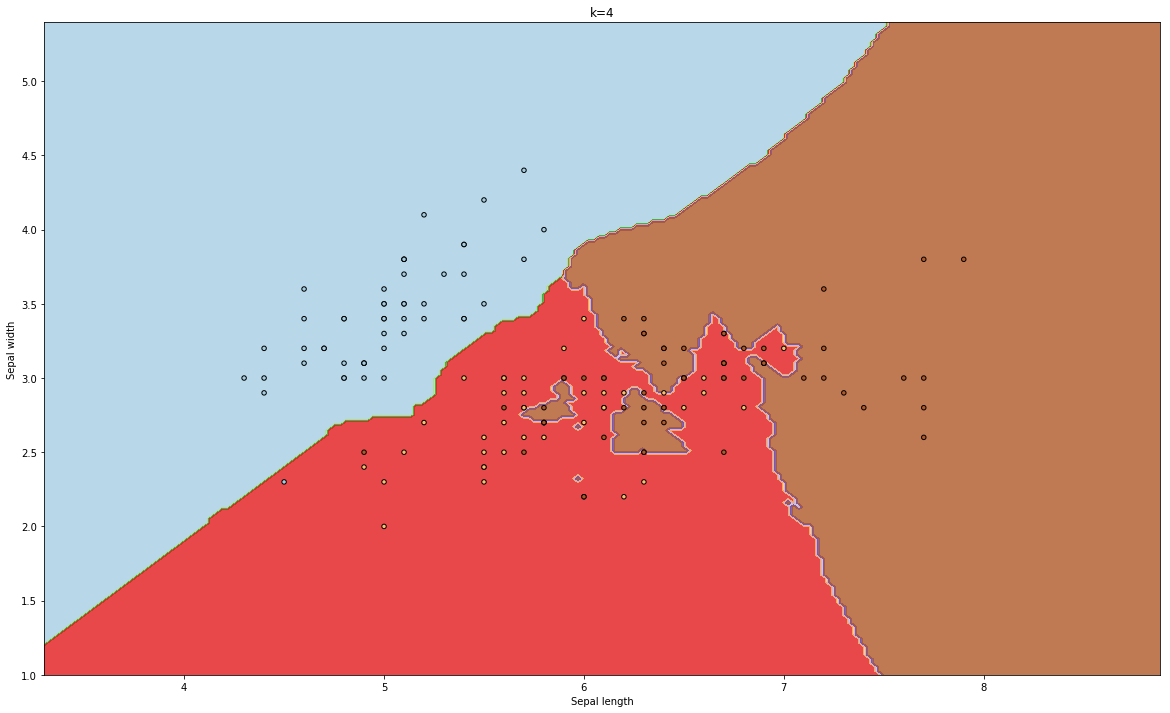

0.7333333333333333
[[10  0  0]
 [ 0  7  2]
 [ 0  6  5]]


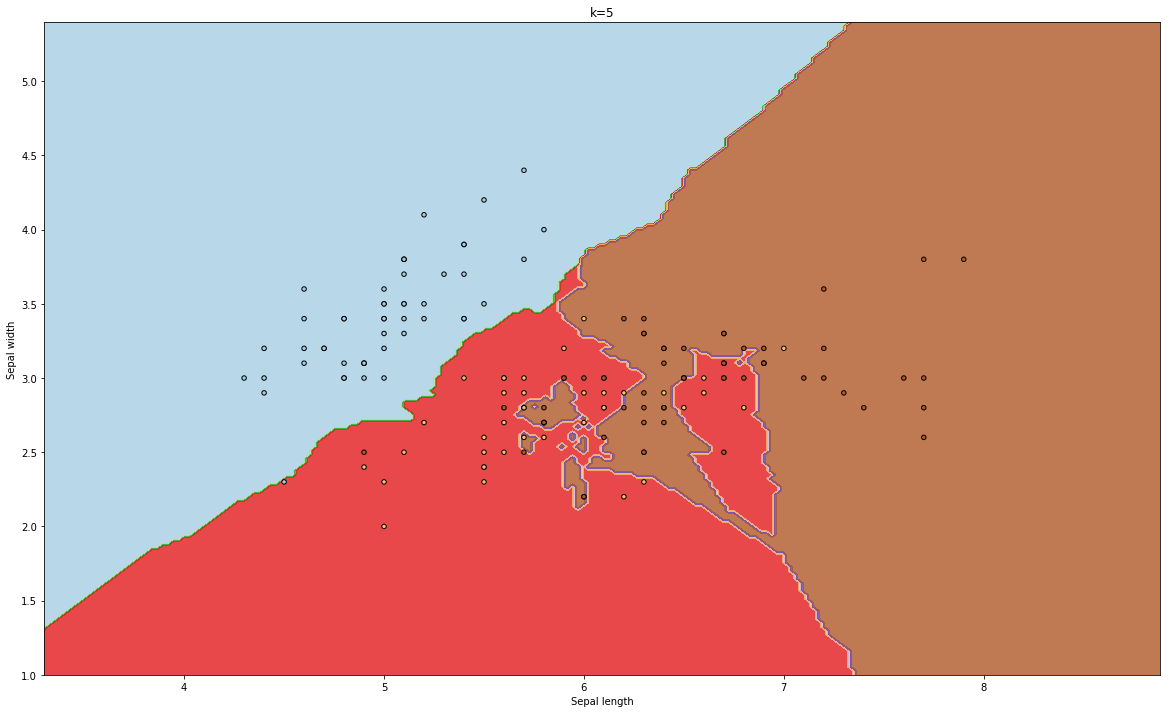

0.8
[[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


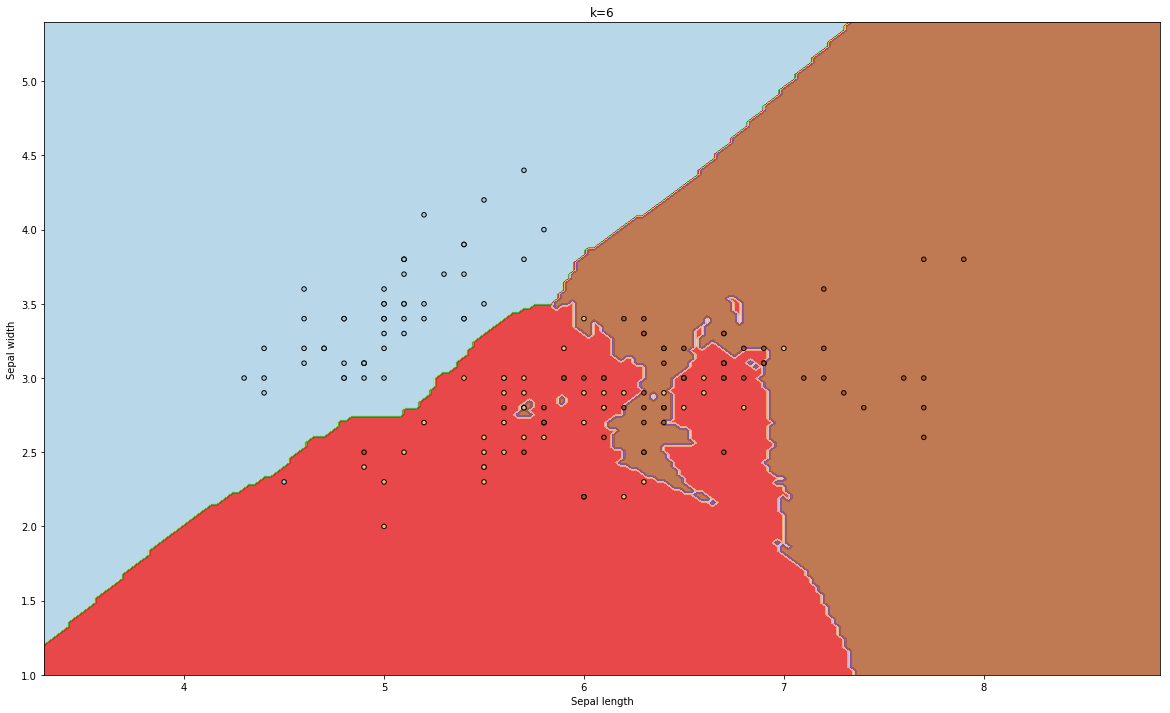

0.7666666666666667
[[10  0  0]
 [ 0  7  2]
 [ 0  5  6]]


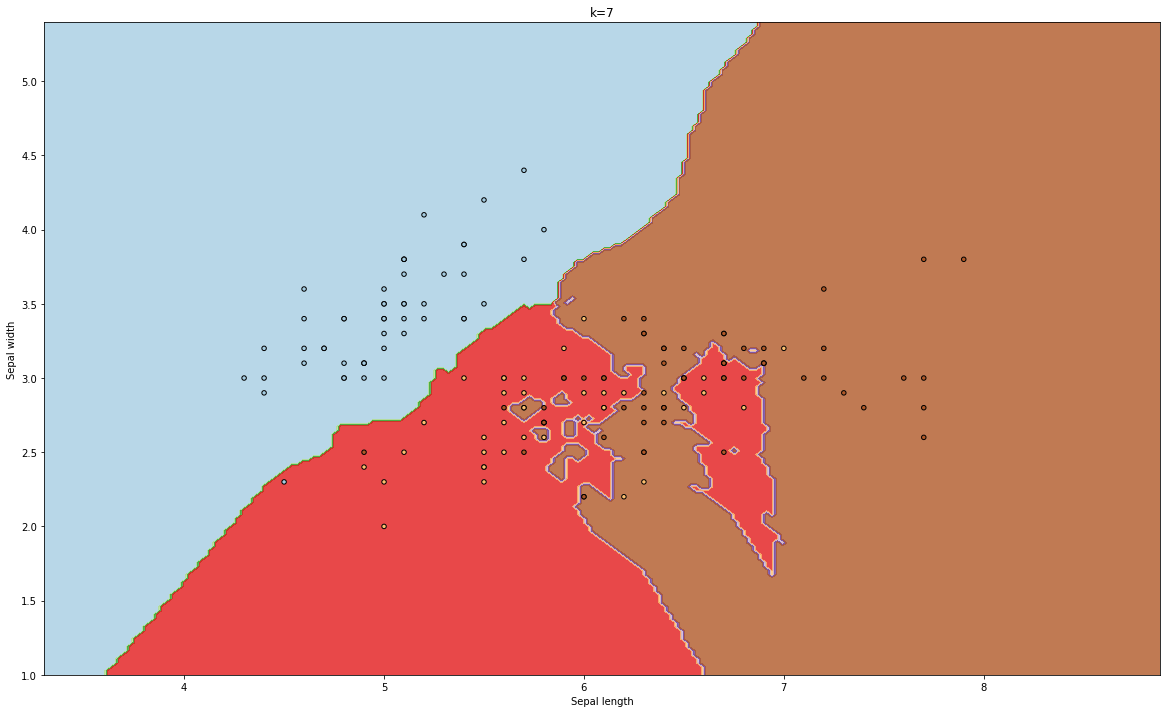

0.7666666666666667
[[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]


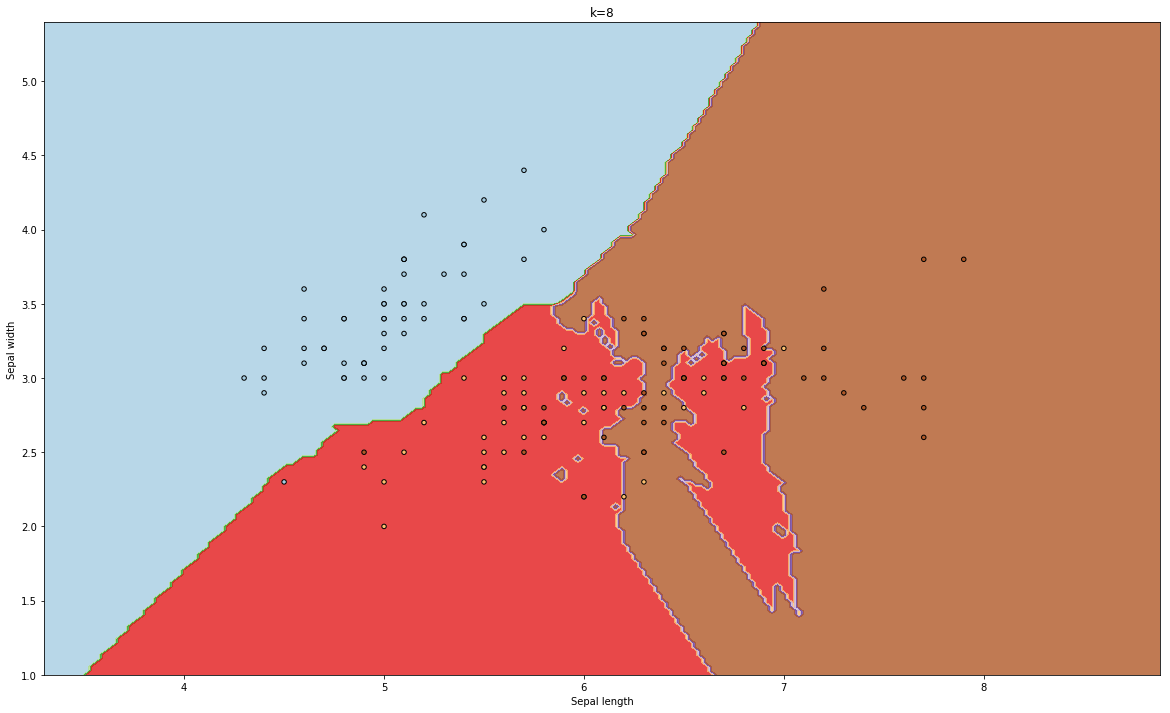

0.7666666666666667
[[10  0  0]
 [ 0  7  2]
 [ 0  5  6]]


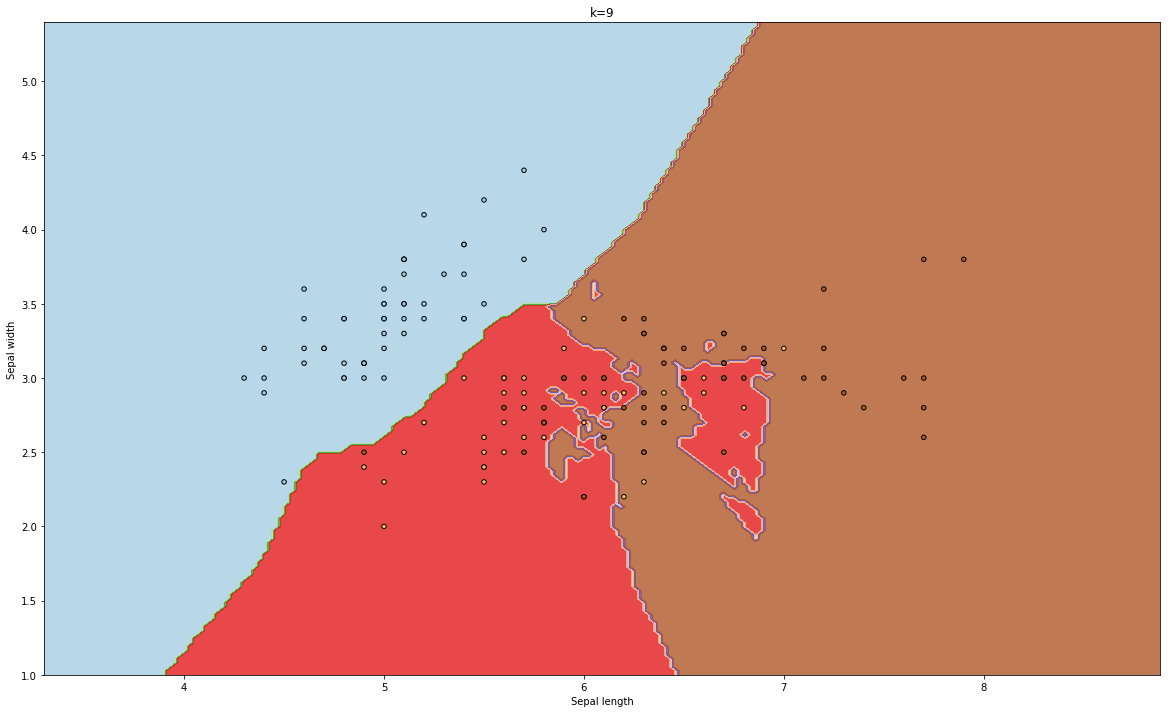

0.8
[[10  0  0]
 [ 0  7  2]
 [ 0  4  7]]


In [49]:
# experimenting with different n values
k_range = range(1,10)
for k in k_range:
    svc = KNeighborsClassifier(n_neighbors=k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    plotSVC(f'k={k}')
        
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

**Grid search**

In [50]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors': list(range(1,20)),
}
# Create a based model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'n_neighbors': 15}
Accuracy score:  
 0.8333333333333334
Confusion matrix: 
 [[10  0  0]
 [ 0  6  3]
 [ 0  2  9]]


[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.2s finished
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Predicción

In [60]:
sorted_algorithm_accuracy = sorted(algorithm_accuracy, key=lambda tup: tup[1])
for algorithm, accuracy in sorted_algorithm_accuracy:
    print(f'{accuracy:.2f} | {algorithm.__class__}')

0.80 | <class 'sklearn.ensemble.forest.RandomForestClassifier'>
0.83 | <class 'sklearn.tree.tree.DecisionTreeClassifier'>
0.83 | <class 'sklearn.neighbors.classification.KNeighborsClassifier'>
0.90 | <class 'sklearn.linear_model.logistic.LogisticRegression'>
0.90 | <class 'sklearn.naive_bayes.GaussianNB'>
0.90 | <class 'sklearn.svm.classes.SVC'>


In [71]:
classifier = sorted_algorithm_accuracy[-2][0]

In [62]:
print(f'Int classes: {classifier.classes_}')
str_classes = le.inverse_transform(classifier.classes_)
print(f'Str classes: {str_classes}')

Int classes: [0 1 2]
Str classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [78]:
# Creamos una nueva instancia de planta:
sepal_width = 5
sepal_length = 3
new_plant = np.array([[sepal_width, sepal_length]])

predictions = classifier.predict_proba(new_plant)
print(f'Sepal width: {sepal_width}')
print(f'Sepal lenth: {sepal_length}')
print(f'Prediction: {list(zip(str_classes, predictions[0]))}')

Sepal width: 5
Sepal lenth: 3
Prediction: [('Iris-setosa', 0.7410476093500773), ('Iris-versicolor', 0.2044988628347197), ('Iris-virginica', 0.054453527815202865)]


In [74]:
# Creamos una nueva instancia de planta:
sepal_width = 5
sepal_length = 3
new_plant = np.array([[sepal_width, sepal_length]])

le.inverse_transform(classifier.predict(new_plant))

array(['Iris-setosa'], dtype=object)